In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import numpy as np
from scipy import stats as st
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.dummy import DummyClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 

###### Importing Dataset :

In [2]:
Data = pd.read_csv("health care diabetes.csv")

###### Data Exploration :

In [3]:
Data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
print('No. of rows and columns : ', Data.shape)

No. of rows and columns :  (768, 9)


In [5]:
print('Columns names :')
print('===============')
print(Data.columns)

Columns names :
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [6]:
print('Dataset structure information :')
print('===============================')
Data.info()

Dataset structure information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
print('Count of missing values : ')
print('==========================')
print(Data.isnull().sum())

Count of missing values : 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


It seems the dataset doesn't have a null value but that doesn't mean its complete. A zero in few columns does indicate
missing value.

In [8]:
print('Dataset data description :')
print('==========================')
Data.describe()

Dataset data description :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


###### Checking for duplicate data

In [9]:
dup = Data.duplicated()
print('Is there any duplicate rows ?')
print('=============================')
print(dup.value_counts())

Is there any duplicate rows ?
False    768
dtype: int64


No duplicate rows found in the dataset.

Exploring the distribution of data of columns 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI'
using histogram and density plot.

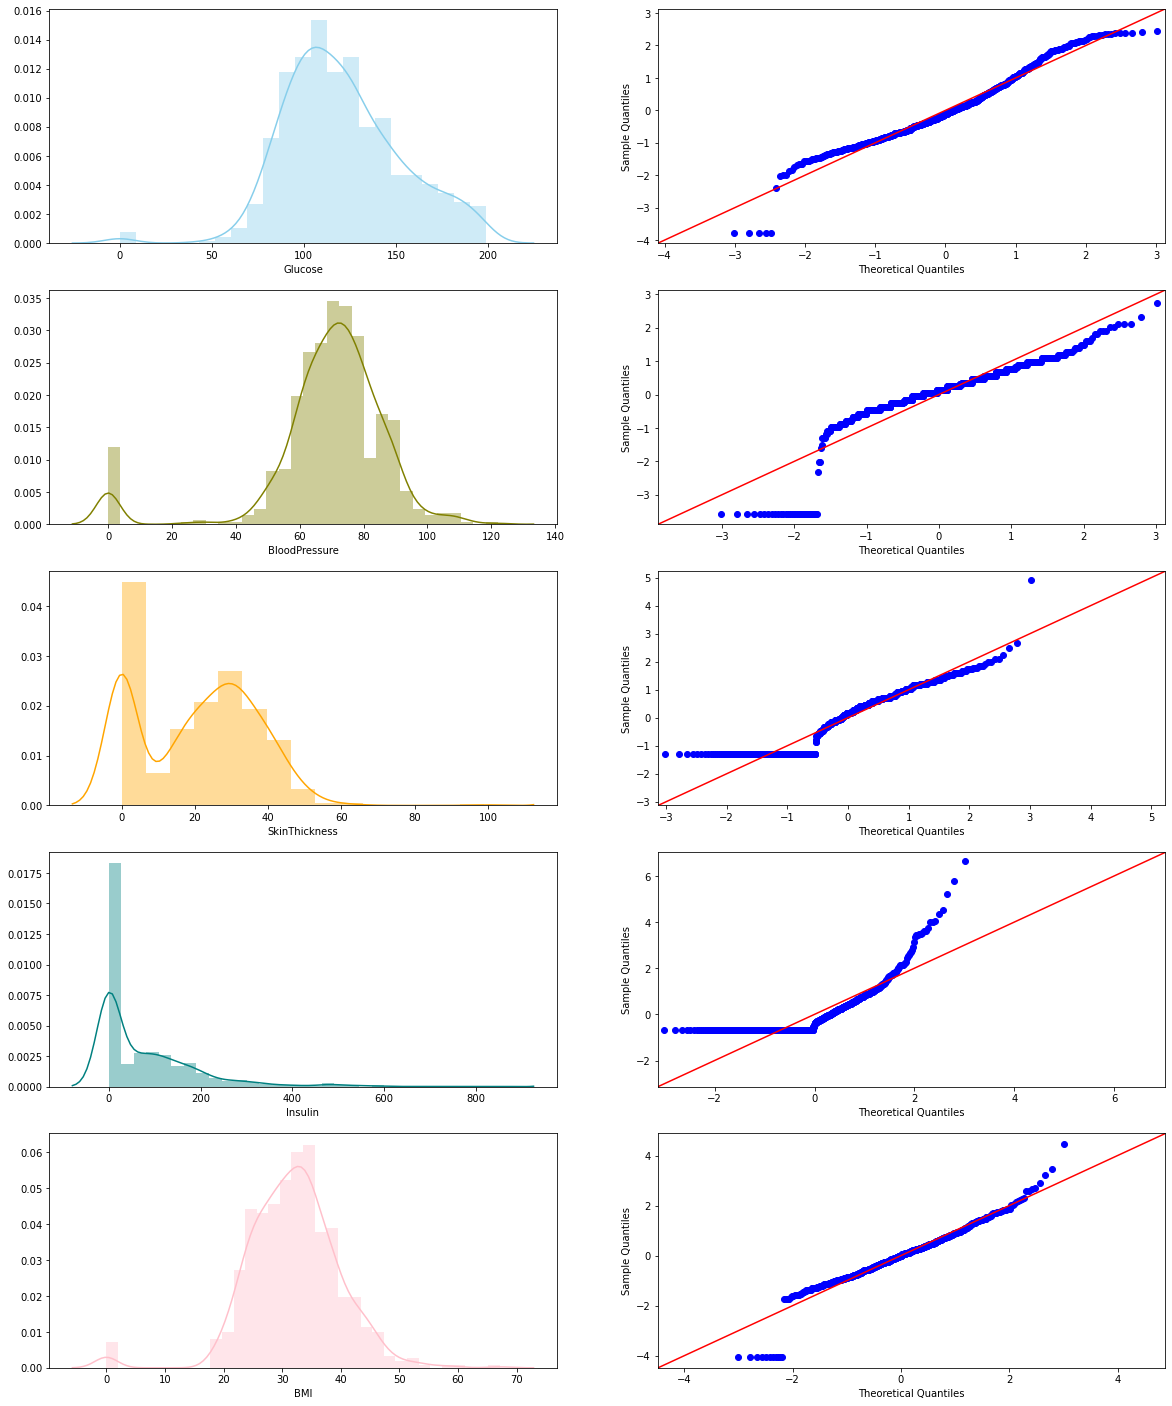

In [10]:
f, axes = plt.subplots(5, 2, figsize=(20, 25))
sns.distplot( Data["Glucose"] , color="skyblue", ax=axes[0,0])
qqplot(Data["Glucose"], line="45", fit=True, ax=axes[0,1])
sns.distplot( Data["BloodPressure"] , color="olive", ax=axes[1, 0])
qqplot(Data["BloodPressure"], line ="45", fit=True, ax=axes[1,1])
sns.distplot( Data["SkinThickness"] , color="Orange", ax=axes[2, 0])
qqplot(Data["SkinThickness"], line ="45", fit=True, ax=axes[2,1])
sns.distplot( Data["Insulin"] , color="teal", ax=axes[3, 0])
qqplot(Data["Insulin"], line ="45", fit=True, ax=axes[3,1])
sns.distplot(Data["BMI"], color="Pink", ax=axes[4, 0])
qqplot(Data["BMI"], line ="45", fit=True, ax=axes[4,1])
plt.show()

Above graph shows that apart from Insulin all other features follows alomst normal distribution. 
Insulin has a lot of zero value, so if we fill those it may too follow normal distribution. 

A zero in columns 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI' indicates a missing values.
So finding all missing values in these columns.

In [11]:
print('Number of missing values in :')
print('=============================')
print('1. Glucose        = ', (Data.Glucose == 0).sum())
print('2. Blood Pressure = ', (Data.BloodPressure == 0).sum())
print('3. Skin Thickness = ', (Data.SkinThickness == 0).sum())
print('4. Insilin        = ', (Data.Insulin == 0).sum())
print('5. BMI            = ', (Data.BMI == 0).sum())

Number of missing values in :
1. Glucose        =  5
2. Blood Pressure =  35
3. Skin Thickness =  227
4. Insilin        =  374
5. BMI            =  11


From above data we can see that Insulin and Skinthickness is missing most of its datas.

In [12]:
Total_Records = Data.shape[0]
Insuline_Missing_Count = (Data.Insulin == 0).sum()
SkinThickness_Missing_Count = (Data.SkinThickness == 0).sum()
Insulin_Missing_Pct = (Insuline_Missing_Count / Total_Records) * 100
SkinThickness_Missing_Pct = (SkinThickness_Missing_Count / Total_Records) * 100
print('% of missing Insulin Data       = ', Insulin_Missing_Pct.round(2))
print('% of missing SkinThickness Data = ', SkinThickness_Missing_Pct.round(2))

% of missing Insulin Data       =  48.7
% of missing SkinThickness Data =  29.56


###### Filling missing values.

I have notice that other than insulin all other features have almost similar mean and median value. So, I am using median
value to fill those features, as median value is independent of outliers. The small difference in mean and median these 
features have may be due to those outliers.
The difference of mean and median for Insulin is very high compare to others. So, for this feature I am using trim-mean
because I want to concentrate on the datas of denser region.

In [13]:
Insulin_Trim_Mean = st.trim_mean(Data.Insulin, .20, axis=0).astype(int)
print('Trim-Mean of Insulin : ', Insulin_Trim_Mean)

Trim-Mean of Insulin :  45


In [14]:
Data.Glucose.replace(0, Data.Glucose.median(), inplace = True)
Data.BloodPressure.replace(0, Data.BloodPressure.median(), inplace = True)
Data.SkinThickness.replace(0, Data.SkinThickness.median(), inplace = True)
Data.Insulin.replace(0, Insulin_Trim_Mean, inplace = True)
Data.BMI.replace(0, Data.BMI.median(), inplace = True)

In [16]:
Data.to_csv('Healthcare.csv')

In [17]:
Data.Insulin.value_counts()

45     377
105     11
140      9
130      9
120      8
      ... 
270      1
271      1
272      1
274      1
14       1
Name: Insulin, Length: 185, dtype: int64

In [18]:
print('Number of missing values in :')
print('=============================')
print('1. Glucose        = ', (Data.Glucose == 0).sum())
print('2. Blood Pressure = ', (Data.BloodPressure == 0).sum())
print('3. Skin Thickness = ', (Data.SkinThickness == 0).sum())
print('4. Insilin        = ', (Data.Insulin == 0).sum())
print('5. BMI            = ', (Data.BMI == 0).sum())

Number of missing values in :
1. Glucose        =  0
2. Blood Pressure =  0
3. Skin Thickness =  0
4. Insilin        =  0
5. BMI            =  0


###### Finding count of data types in the dataset.

In [19]:
D = pd.DataFrame(Data.dtypes)
D.rename(columns= {0: 'Type'}, inplace=True)
D.replace(['int64', 'float64'], ['Integer', 'Float'], inplace=True)
print("Types of data type :")
print('====================')
D

Types of data type :


,Type
Pregnancies,Integer
Glucose,Integer
BloodPressure,Integer
SkinThickness,Integer
Insulin,Integer
BMI,Float
DiabetesPedigreeFunction,Float
Age,Integer
Outcome,Integer


In [20]:
print('Count of data types :')
print('=====================')
print(D.Type.value_counts())

Count of data types :
Integer    7
Float      2
Name: Type, dtype: int64


###### Plotting the data type count using bar graph

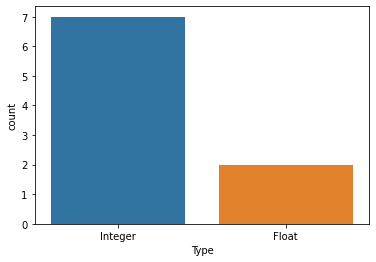

In [21]:
sns.countplot(x = 'Type', data = D)

###### Univariate analysis

Count of Values in Pregnancies :
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


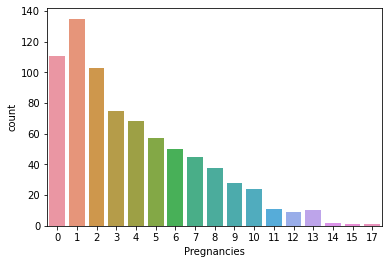

In [22]:
print('Count of Values in Pregnancies :')
print('================================')
P = Data.Pregnancies.value_counts().sort_index()
print(P)
sns.countplot(x='Pregnancies', data = Data)

Count of Values in Glucose :
44     1
56     1
57     2
61     1
62     1
      ..
195    2
196    3
197    4
198    1
199    1
Name: Glucose, Length: 135, dtype: int64


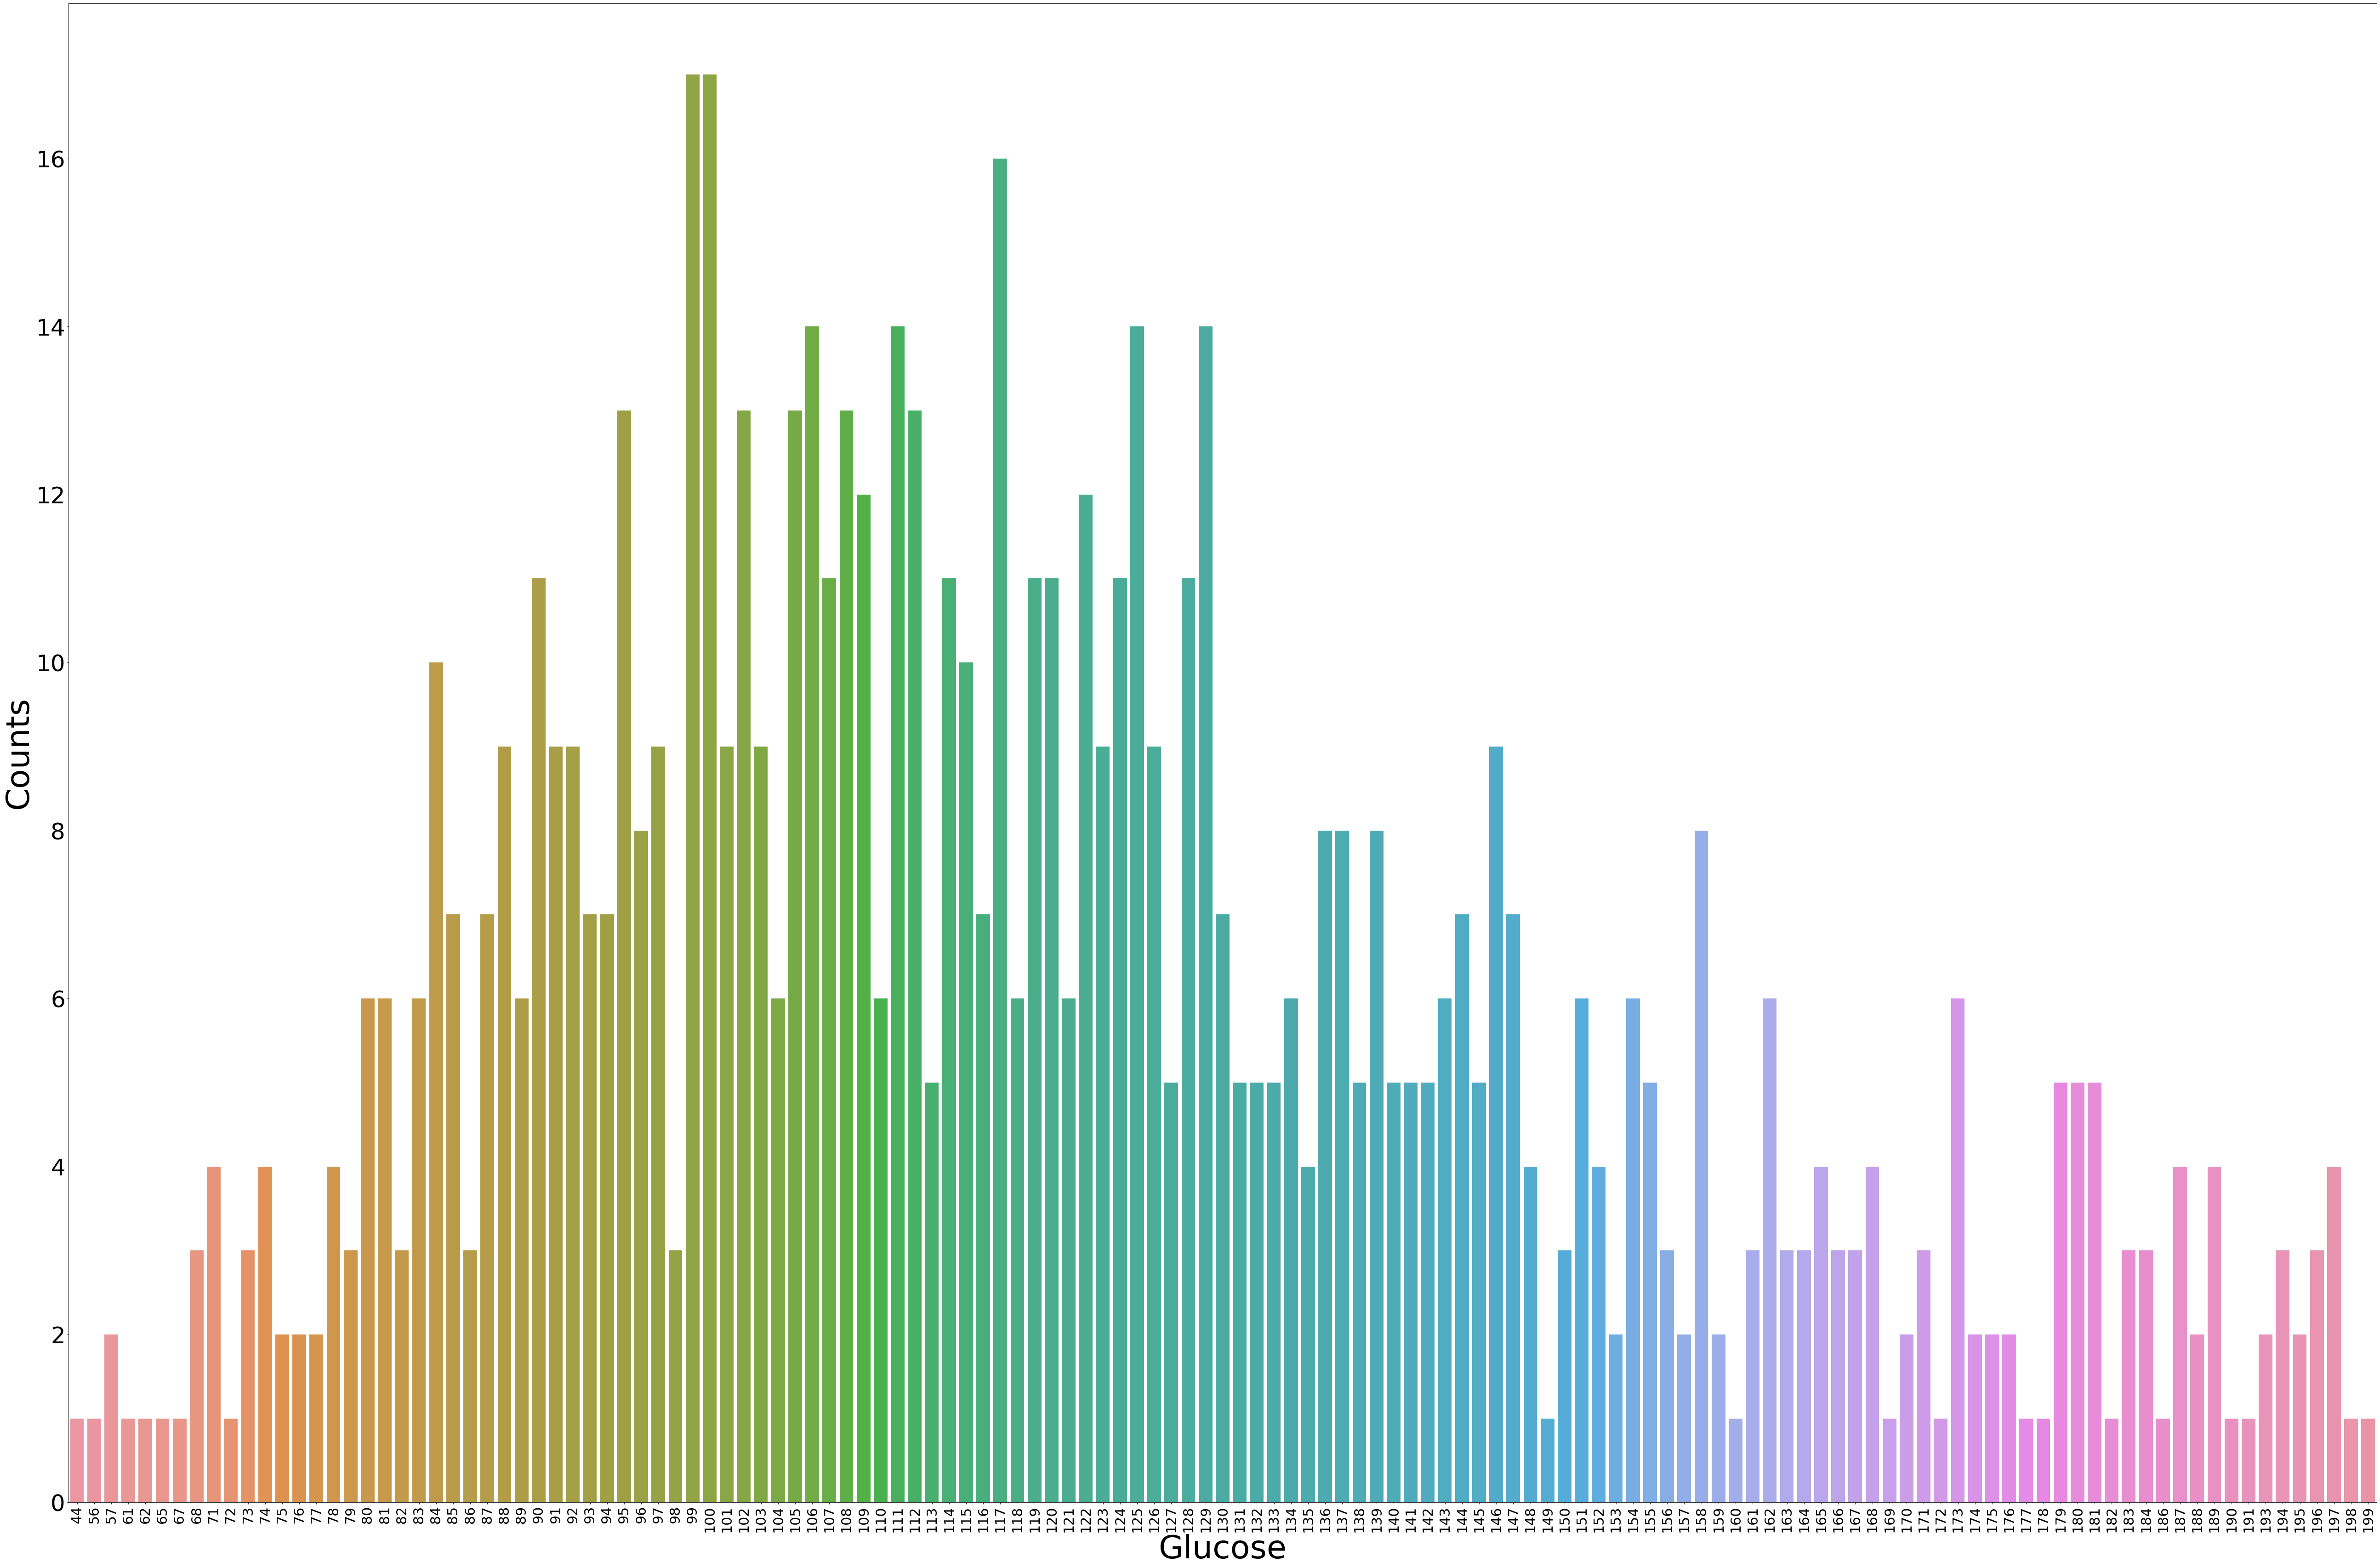

In [23]:
print('Count of Values in Glucose :')
print('============================')
P = Data.Glucose.value_counts().sort_index()
print(P)
plt.figure(figsize=(90,60))
sns.countplot(x='Glucose', data = Data)
plt.xticks(rotation='vertical', fontsize = 30)
plt.xlabel('Glucose', fontsize=70)
plt.yticks(fontsize = 50)
plt.ylabel('Counts', fontsize =70)
plt.show()

Count of Values in Blood Presure :
24      1
30      2
38      1
40      1
44      4
46      2
48      5
50     13
52     11
54     11
55      2
56     12
58     21
60     37
61      1
62     34
64     43
65      7
66     30
68     45
70     57
72     79
74     52
75      8
76     39
78     45
80     40
82     30
84     23
85      6
86     21
88     25
90     22
92      8
94      6
95      1
96      4
98      3
100     3
102     1
104     2
106     3
108     2
110     3
114     1
122     1
Name: BloodPressure, dtype: int64


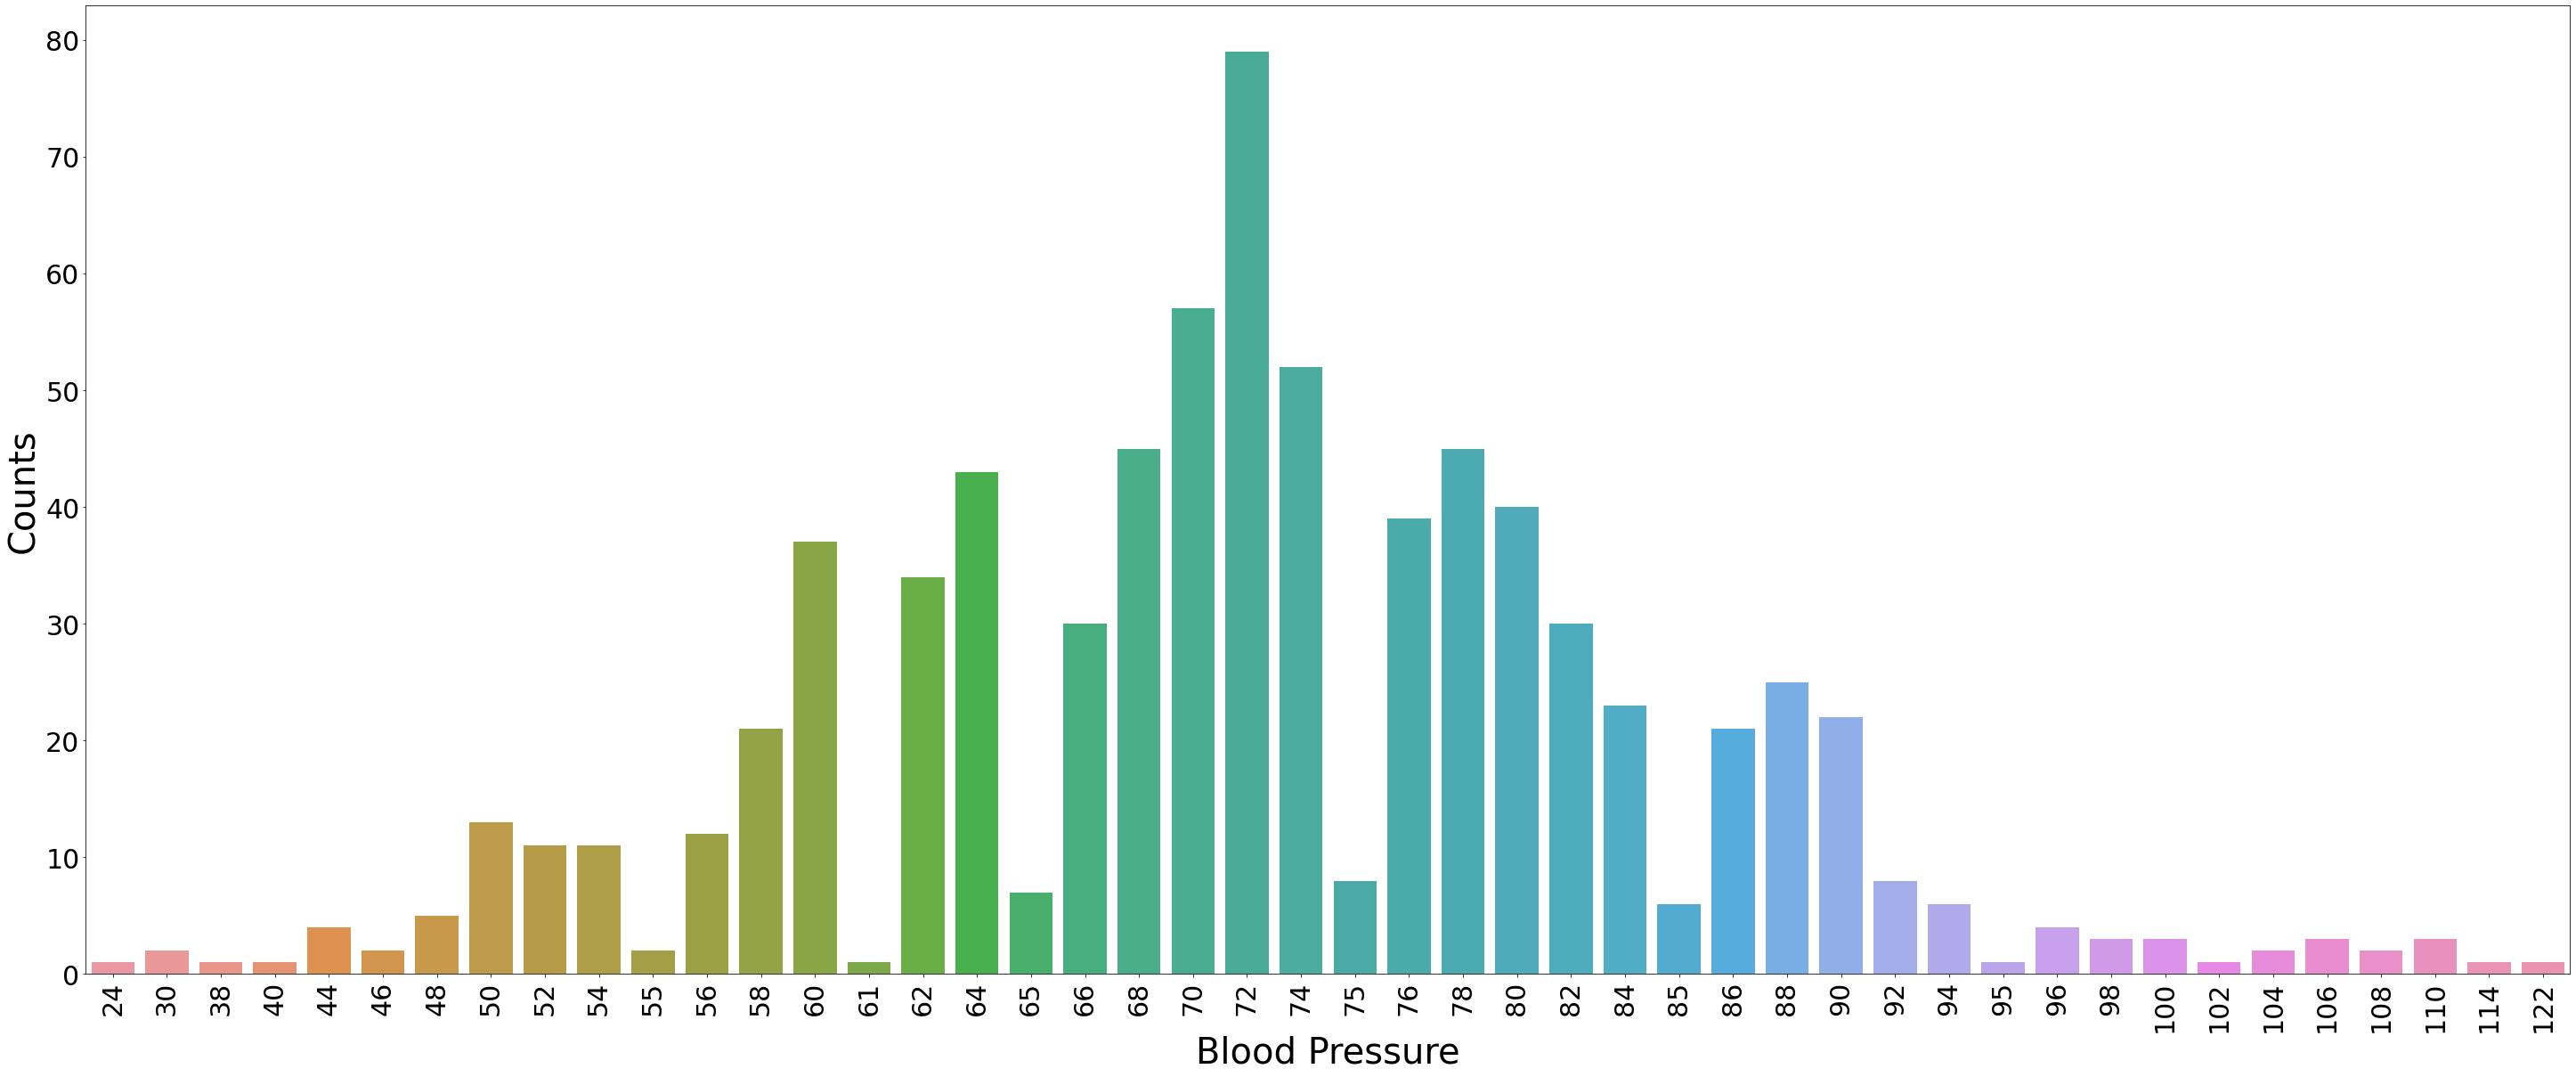

In [24]:
print('Count of Values in Blood Presure :')
print('==================================')
P = Data.BloodPressure.value_counts().sort_index()
print(P)
plt.figure(figsize = (50, 20))
sns.countplot(x='BloodPressure', data = Data)
plt.xticks(rotation='vertical', fontsize=30)
plt.xlabel('Blood Pressure', fontsize =40)
plt.yticks(fontsize = 30)
plt.ylabel('Counts', fontsize = 40)
plt.show()

Count of Values in Skin Thickness :
7       2
8       2
10      5
11      6
12      7
13     11
14      6
15     14
16      6
17     14
18     20
19     18
20     13
21     10
22     16
23    249
24     12
25     16
26     16
27     23
28     20
29     17
30     27
31     19
32     31
33     20
34      8
35     15
36     14
37     16
38      7
39     18
40     16
41     15
42     11
43      6
44      5
45      6
46      8
47      4
48      4
49      3
50      3
51      1
52      2
54      2
56      1
60      1
63      1
99      1
Name: SkinThickness, dtype: int64


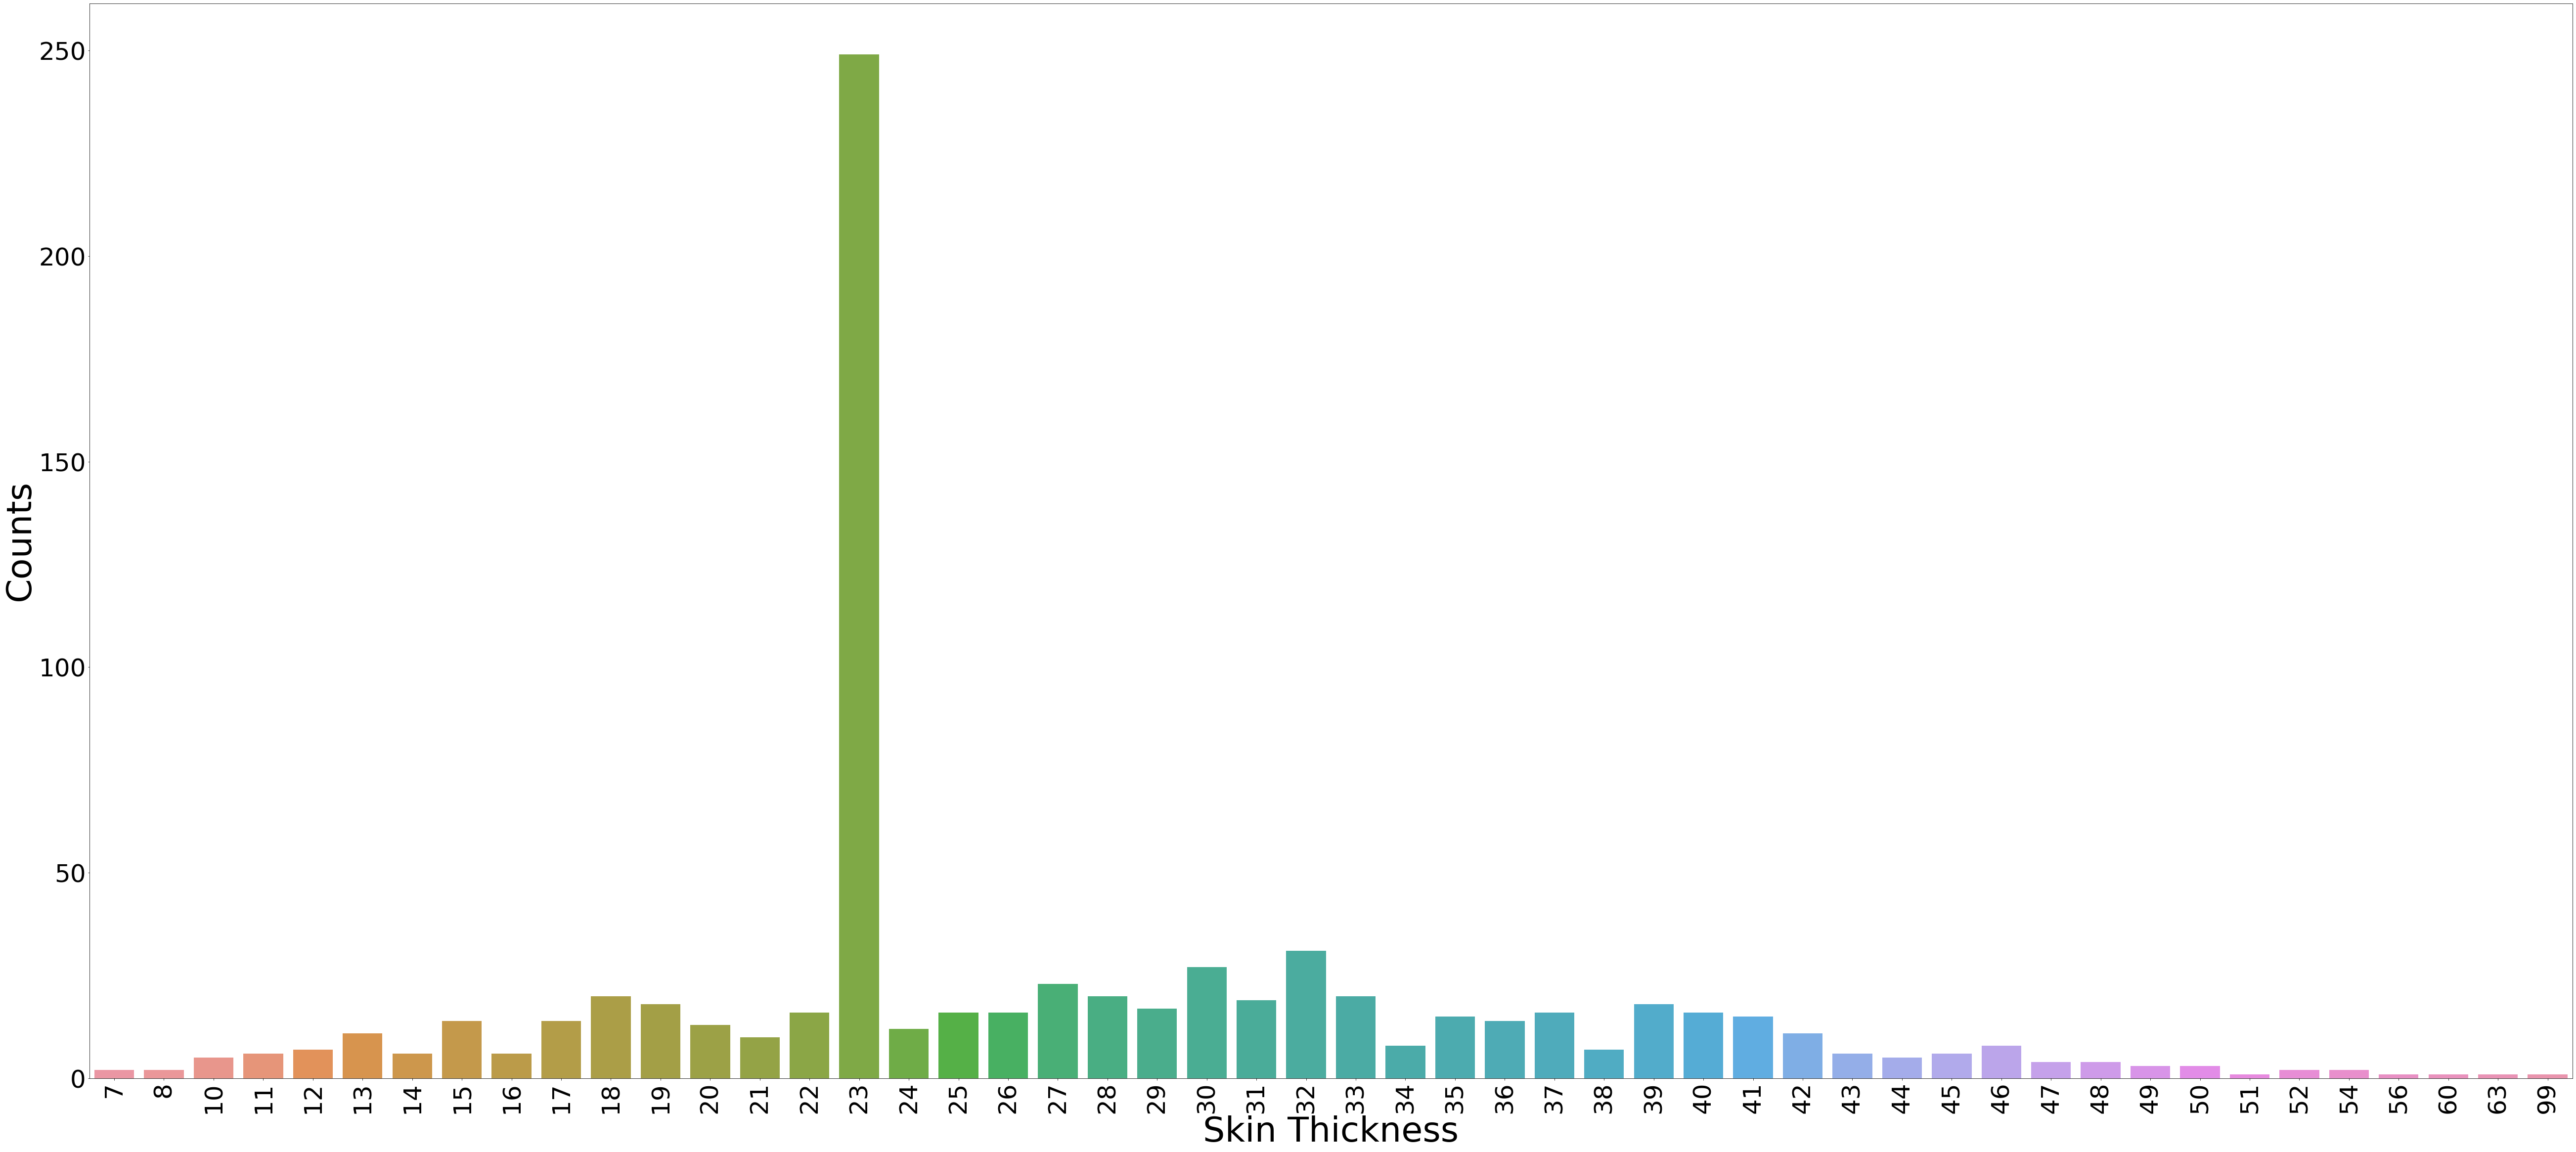

In [25]:
print('Count of Values in Skin Thickness :')
print('===================================')
P = Data.SkinThickness.value_counts().sort_index()
print(P)
plt.figure(figsize = (90, 40))
sns.countplot(x='SkinThickness', data = Data)
plt.xticks(rotation='vertical', fontsize=50)
plt.xlabel('Skin Thickness', fontsize=70)
plt.yticks(fontsize = 50)
plt.ylabel('Counts', fontsize=70)
plt.show()

Count of Values in Insulin :
14     1
15     1
16     1
18     2
22     1
      ..
579    1
600    1
680    1
744    1
846    1
Name: Insulin, Length: 185, dtype: int64


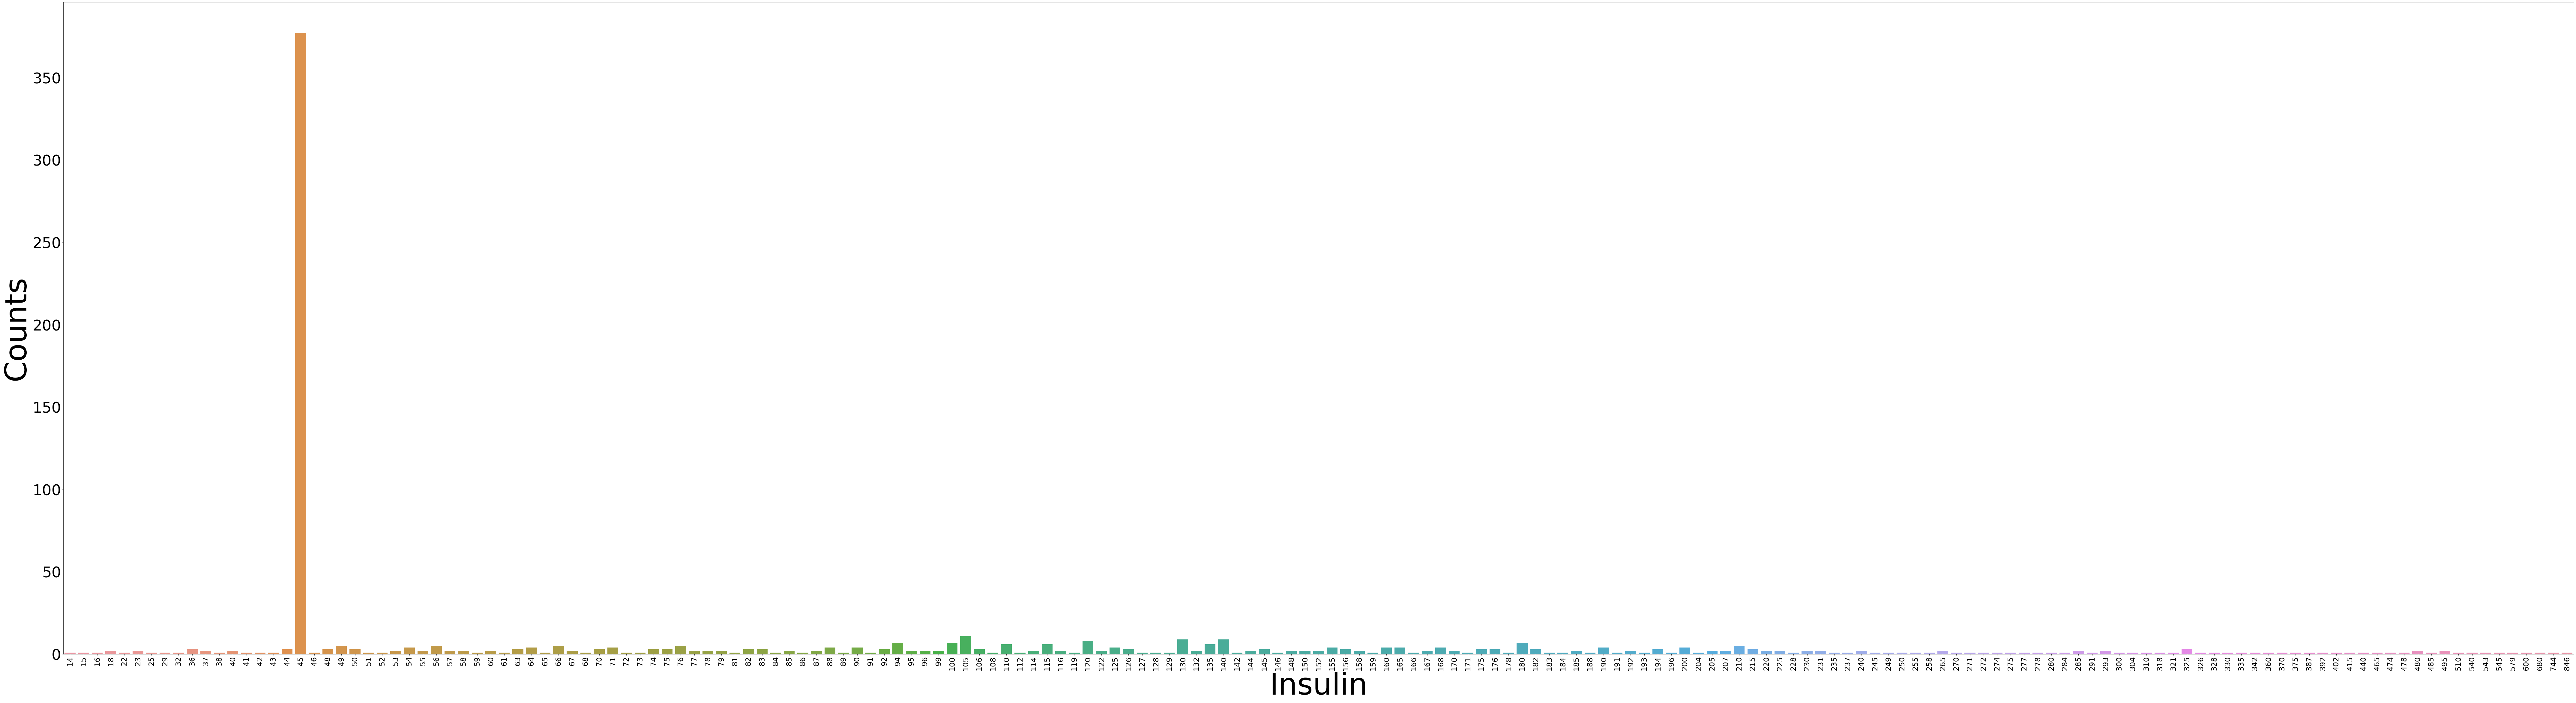

In [26]:
print('Count of Values in Insulin :')
print('============================')
P = Data.Insulin.value_counts().sort_index()
print(P)
plt.figure(figsize = (150, 40))
sns.countplot(data=Data, x="Insulin")
plt.xticks(rotation='vertical', fontsize=25)
plt.xlabel('Insulin', fontsize=100)
plt.yticks(fontsize = 50)
plt.ylabel('Counts', fontsize=100)
plt.show()

Count of Values in BMI :
18.2    3
18.4    1
19.1    1
19.3    1
19.4    1
       ..
53.2    1
55.0    1
57.3    1
59.4    1
67.1    1
Name: BMI, Length: 247, dtype: int64


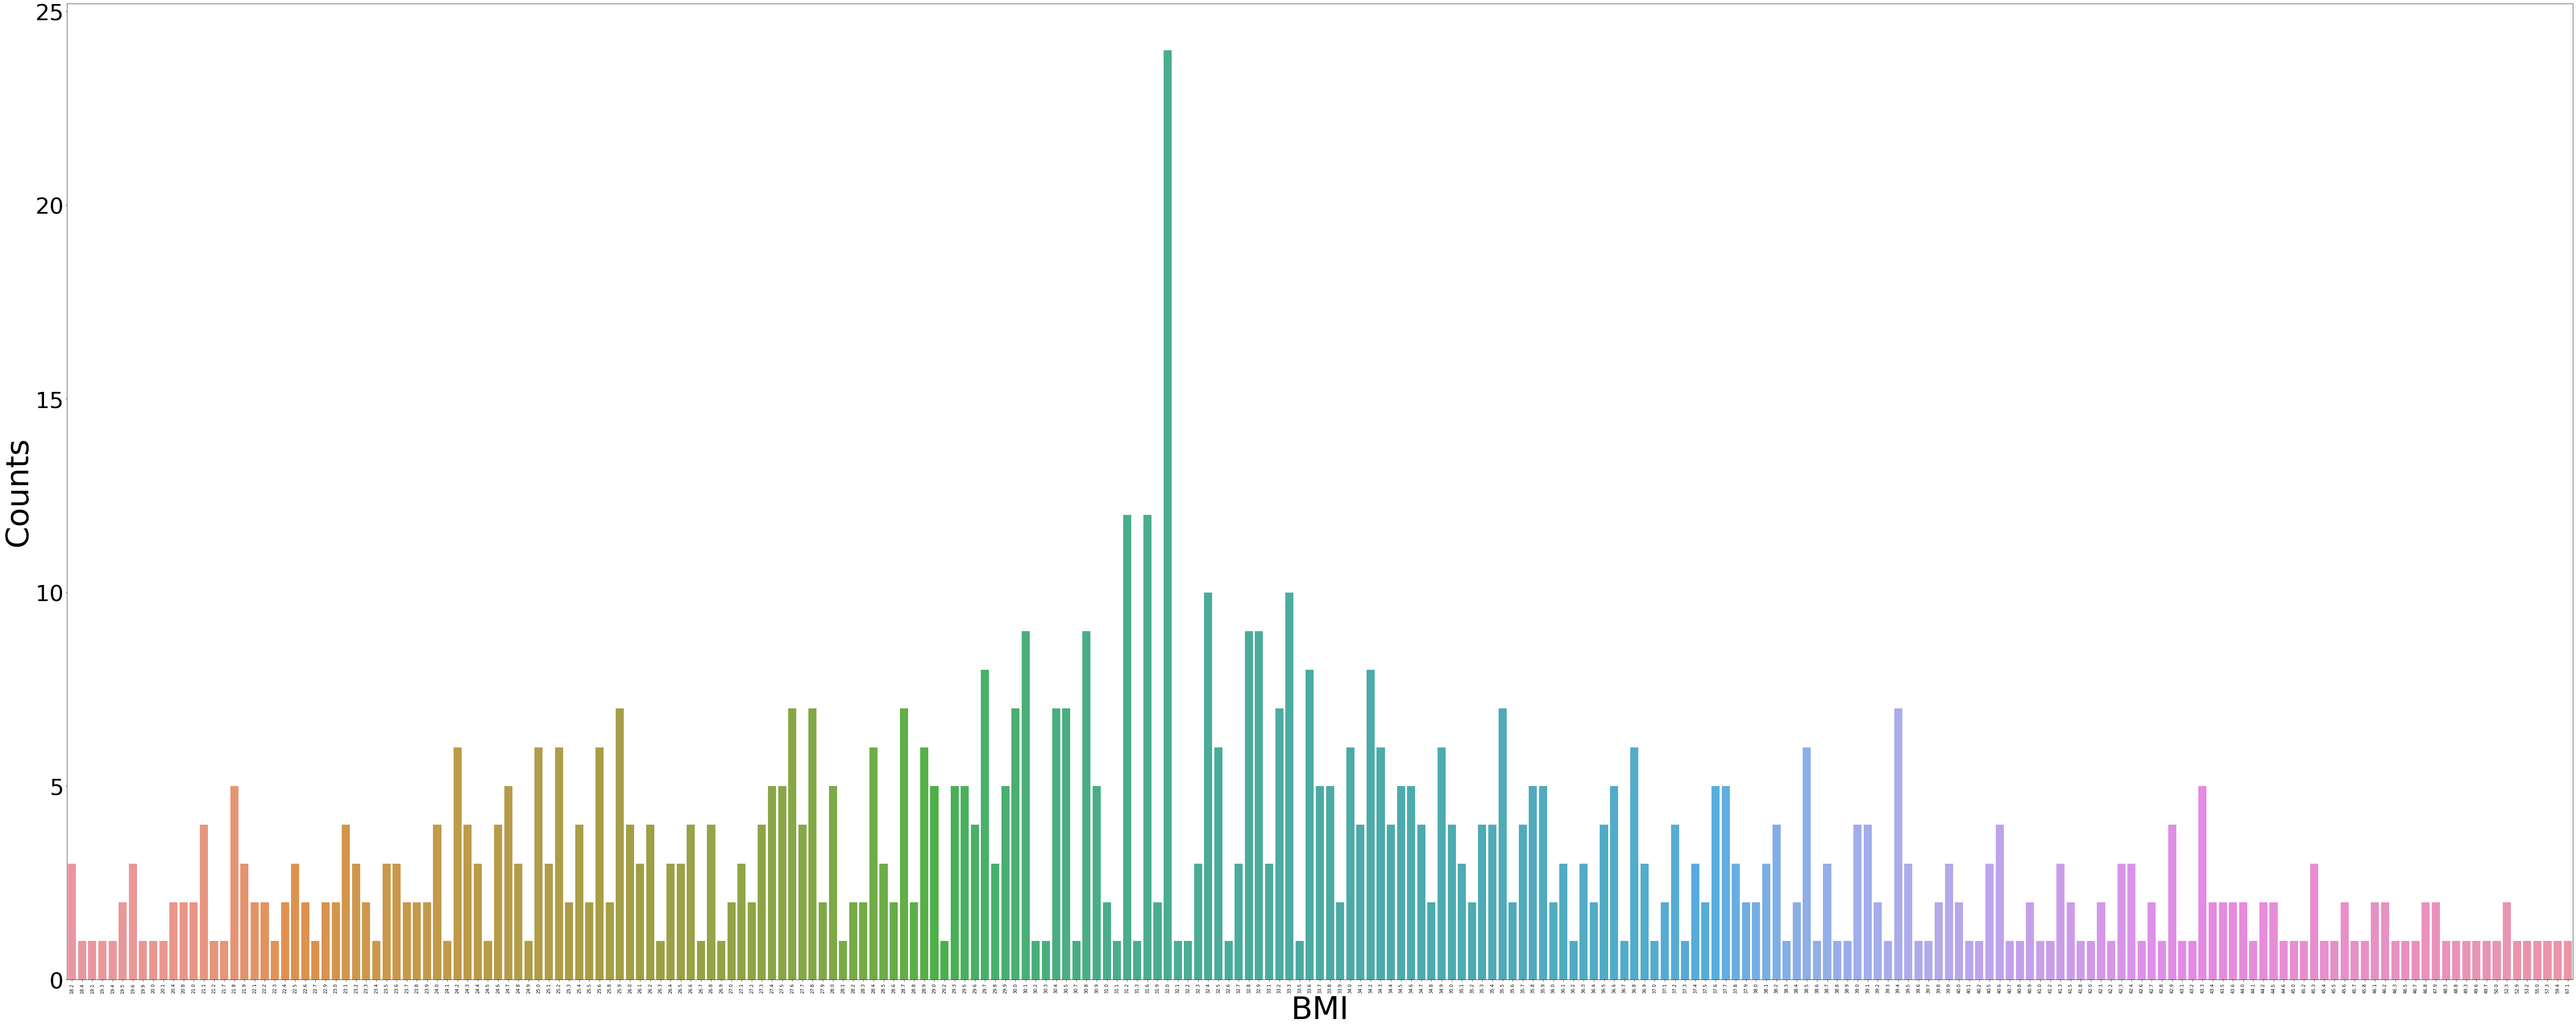

In [27]:
print('Count of Values in BMI :')
print('========================')
P = Data.BMI.value_counts().sort_index()
print(P)
plt.figure(figsize = (100, 40))
sns.countplot(data=Data, x="BMI")
plt.xticks(rotation='vertical', fontsize= 10)
plt.xlabel('BMI', fontsize=70)
plt.yticks(fontsize =50)
plt.ylabel("Counts", fontsize=70)
plt.show()

Count of Values in Diabetes Pedigree Function :
0.078    1
0.084    1
0.085    2
0.088    2
0.089    1
        ..
1.893    1
2.137    1
2.288    1
2.329    1
2.420    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64


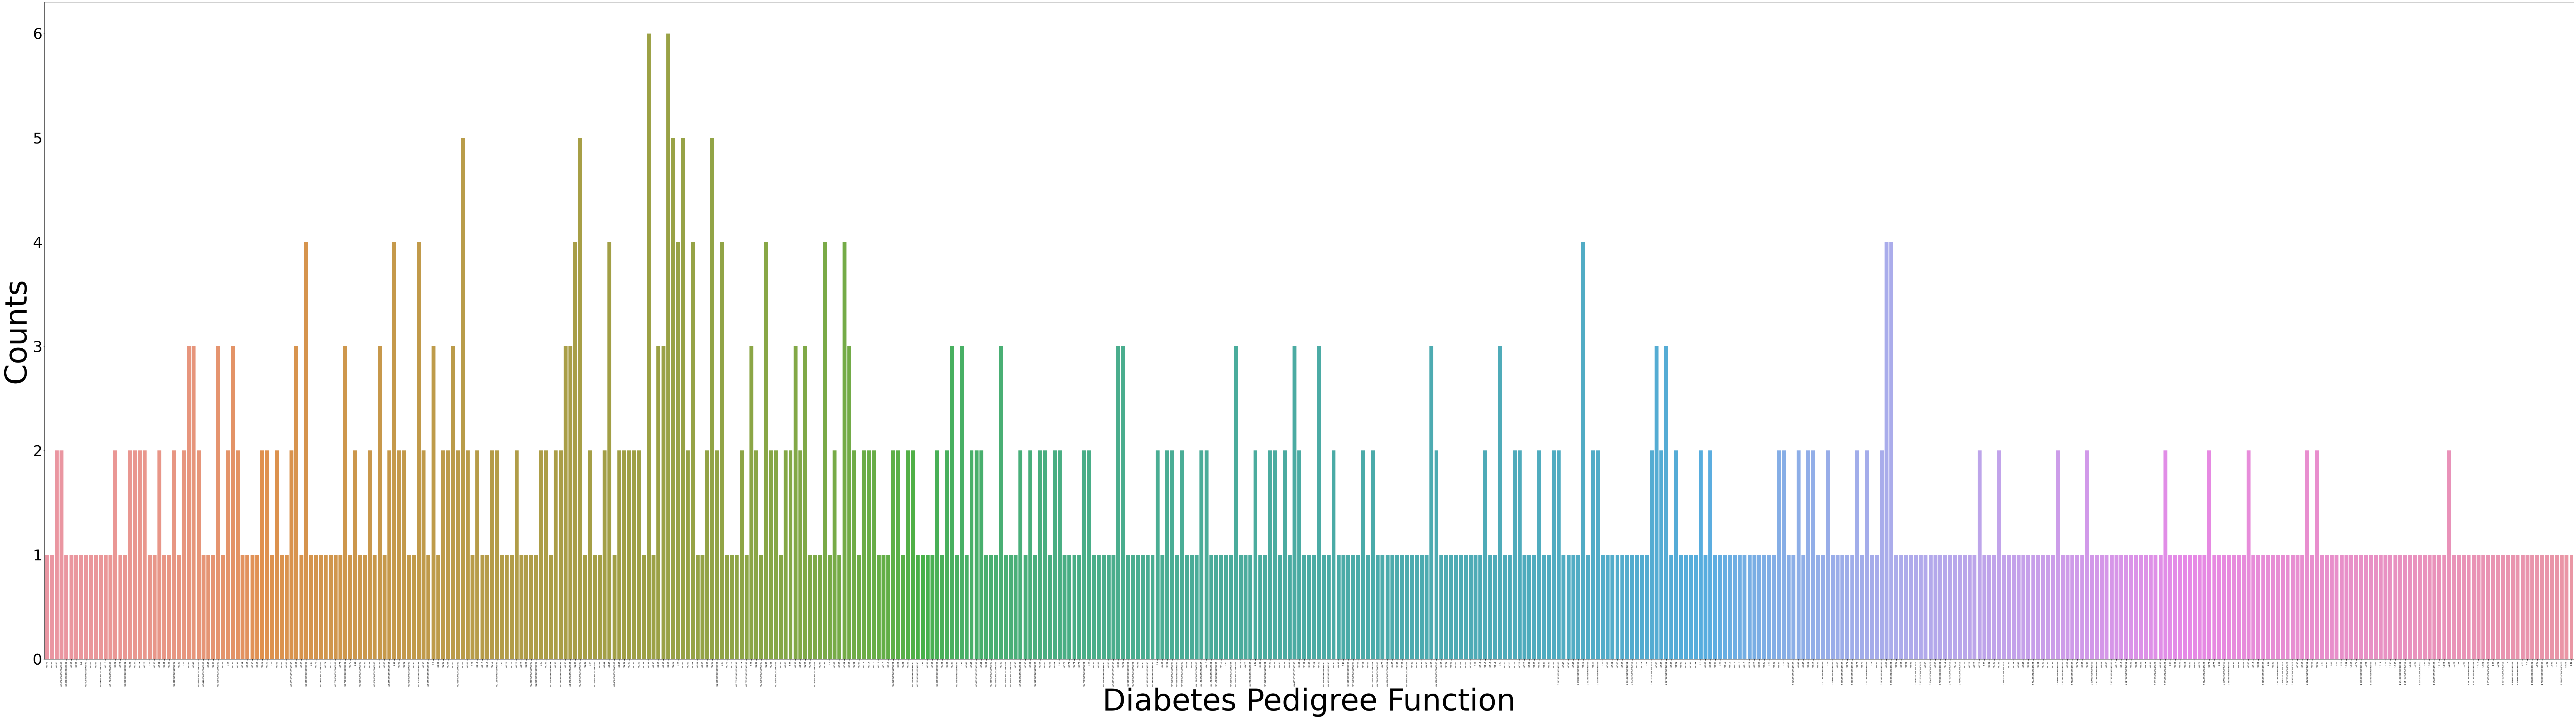

In [28]:
print('Count of Values in Diabetes Pedigree Function :')
print('===============================================')
P = Data.DiabetesPedigreeFunction.value_counts().sort_index()
print(P)
plt.figure(figsize = (150, 40))
sns.countplot(data=Data, x="DiabetesPedigreeFunction")
plt.xticks(rotation='vertical', fontsize=7)
plt.xlabel('Diabetes Pedigree Function', fontsize=100)
plt.yticks(fontsize = 50)
plt.ylabel('Counts', fontsize=100)
plt.show()

Count of Values in Age :
21    63
22    72
23    38
24    46
25    48
26    33
27    32
28    35
29    29
30    21
31    24
32    16
33    17
34    14
35    10
36    16
37    19
38    16
39    12
40    13
41    22
42    18
43    13
44     8
45    15
46    13
47     6
48     5
49     5
50     8
51     8
52     8
53     5
54     6
55     4
56     3
57     5
58     7
59     3
60     5
61     2
62     4
63     4
64     1
65     3
66     4
67     3
68     1
69     2
70     1
72     1
81     1
Name: Age, dtype: int64


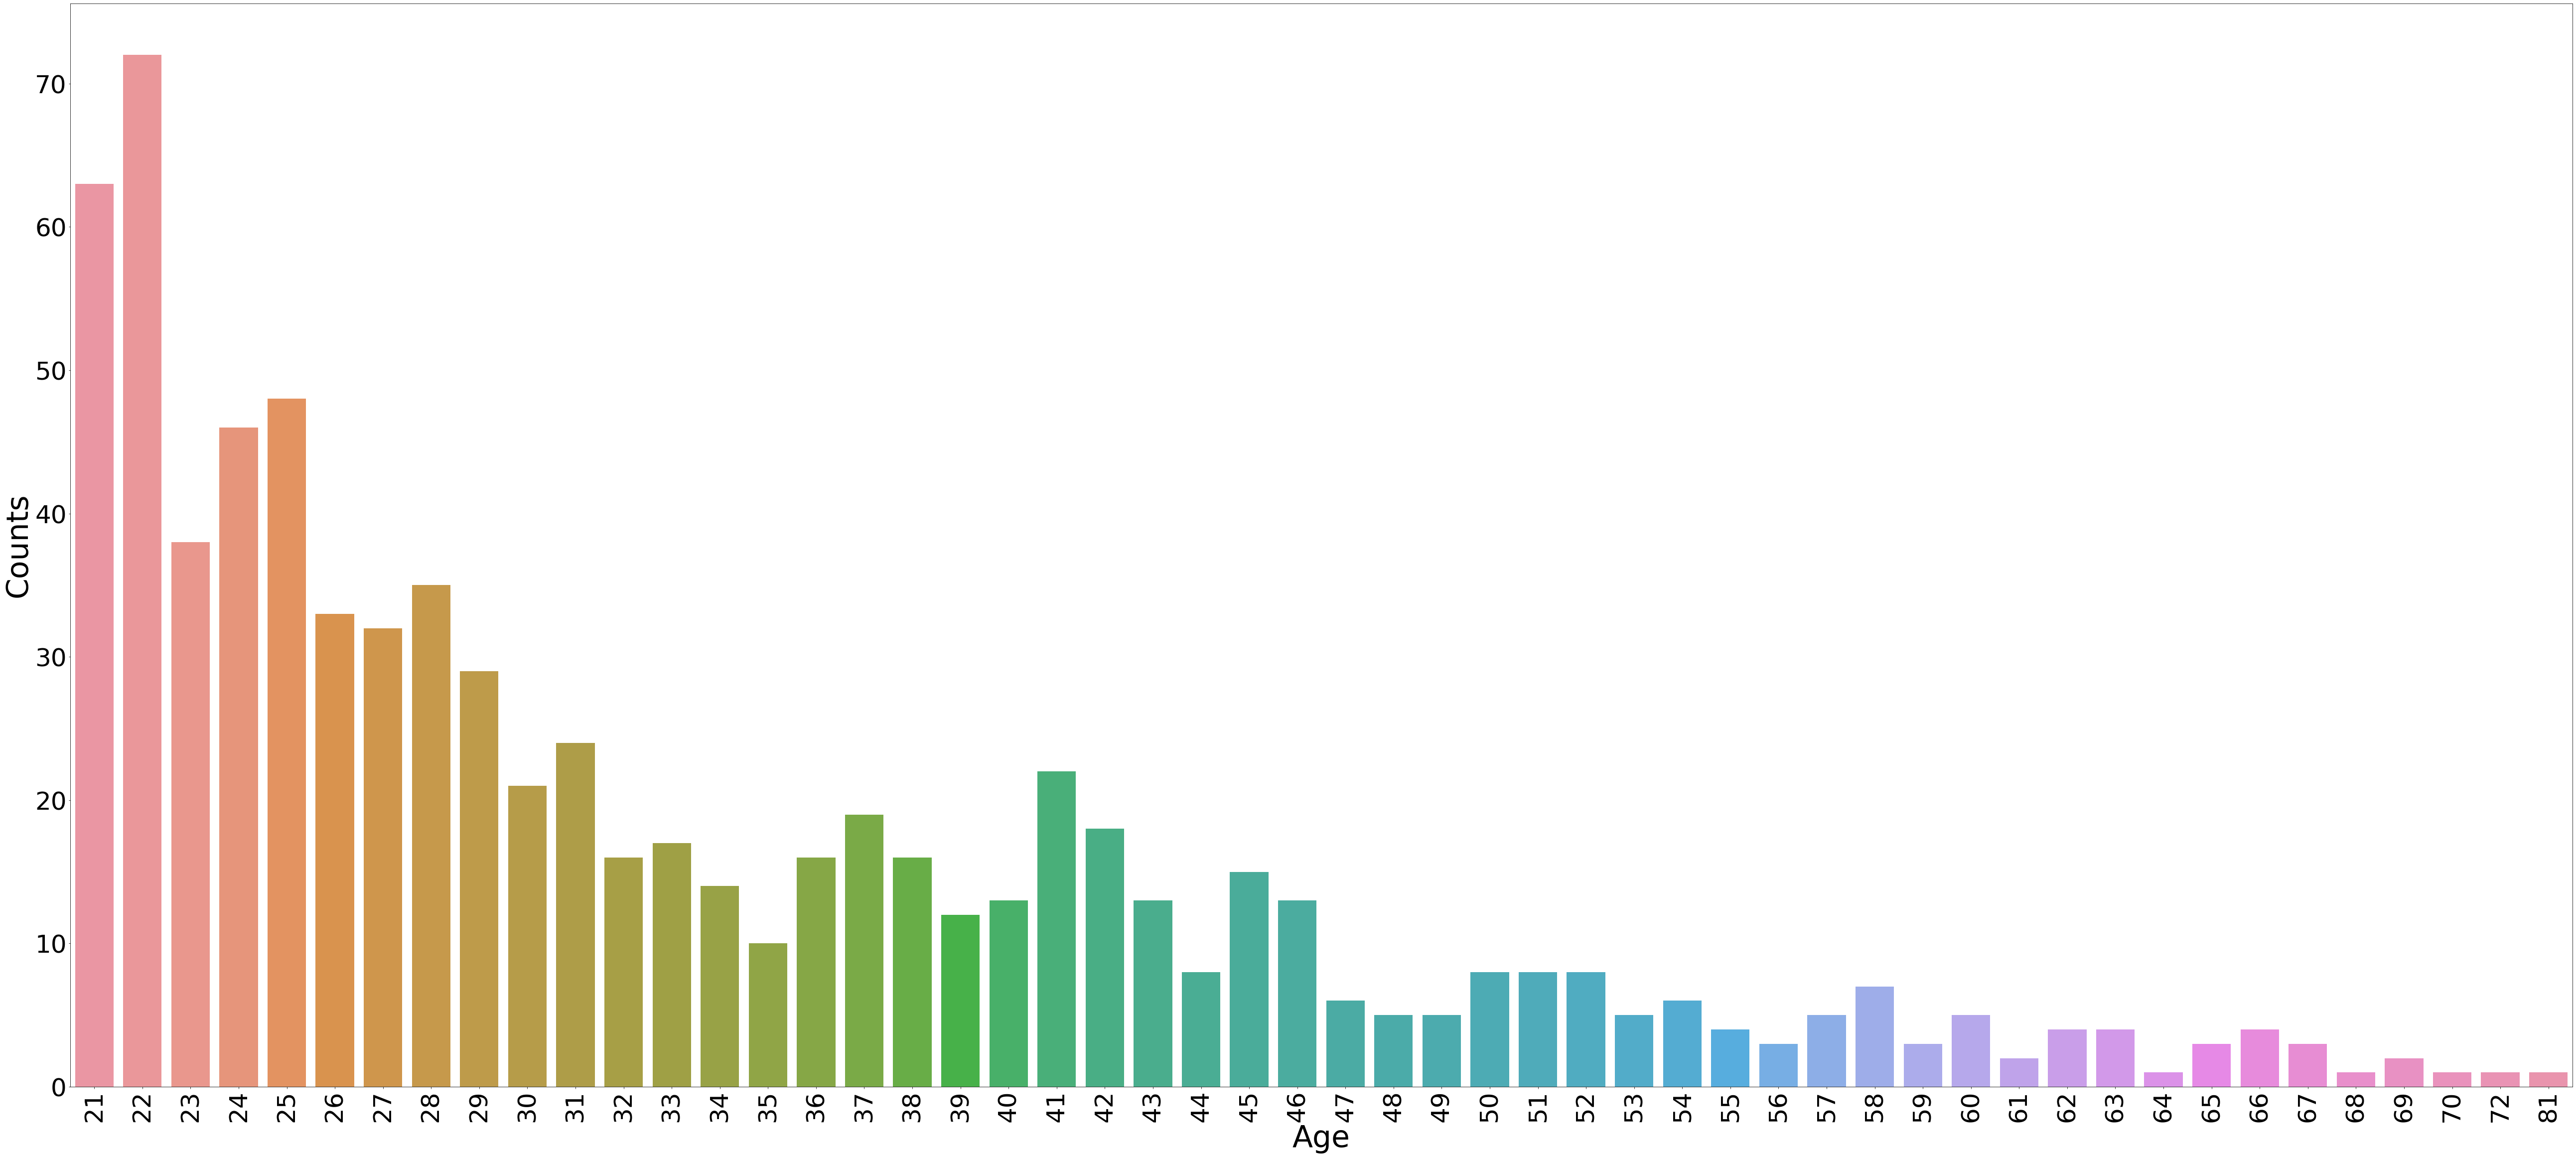

In [29]:
print('Count of Values in Age :')
print('========================')
P = Data.Age.value_counts().sort_index()
print(P)
plt.figure(figsize = (90, 40))
sns.countplot(data=Data, x="Age")
plt.xticks(rotation='vertical', fontsize=50)
plt.xlabel('Age', fontsize=60)
plt.yticks(fontsize =50)
plt.ylabel('Counts', fontsize=60)
plt.show()

Count of Values in Outcome :
0    500
1    268
Name: Outcome, dtype: int64


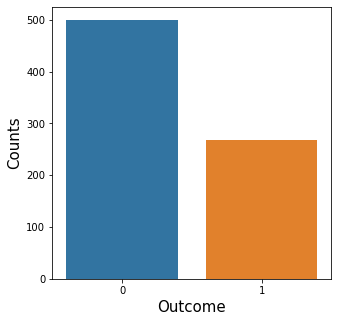

In [30]:
print('Count of Values in Outcome :')
print('============================')
P = Data.Outcome.value_counts().sort_index()
print(P)
plt.figure(figsize = (5, 5))
sns.countplot(data=Data, x="Outcome")
plt.xticks(fontsize=10)
plt.xlabel('Outcome', fontsize=15)
plt.yticks(fontsize =10)
plt.ylabel('Counts', fontsize=15)
plt.show()

###### Analyzing the distribution of data after filling all missing values.

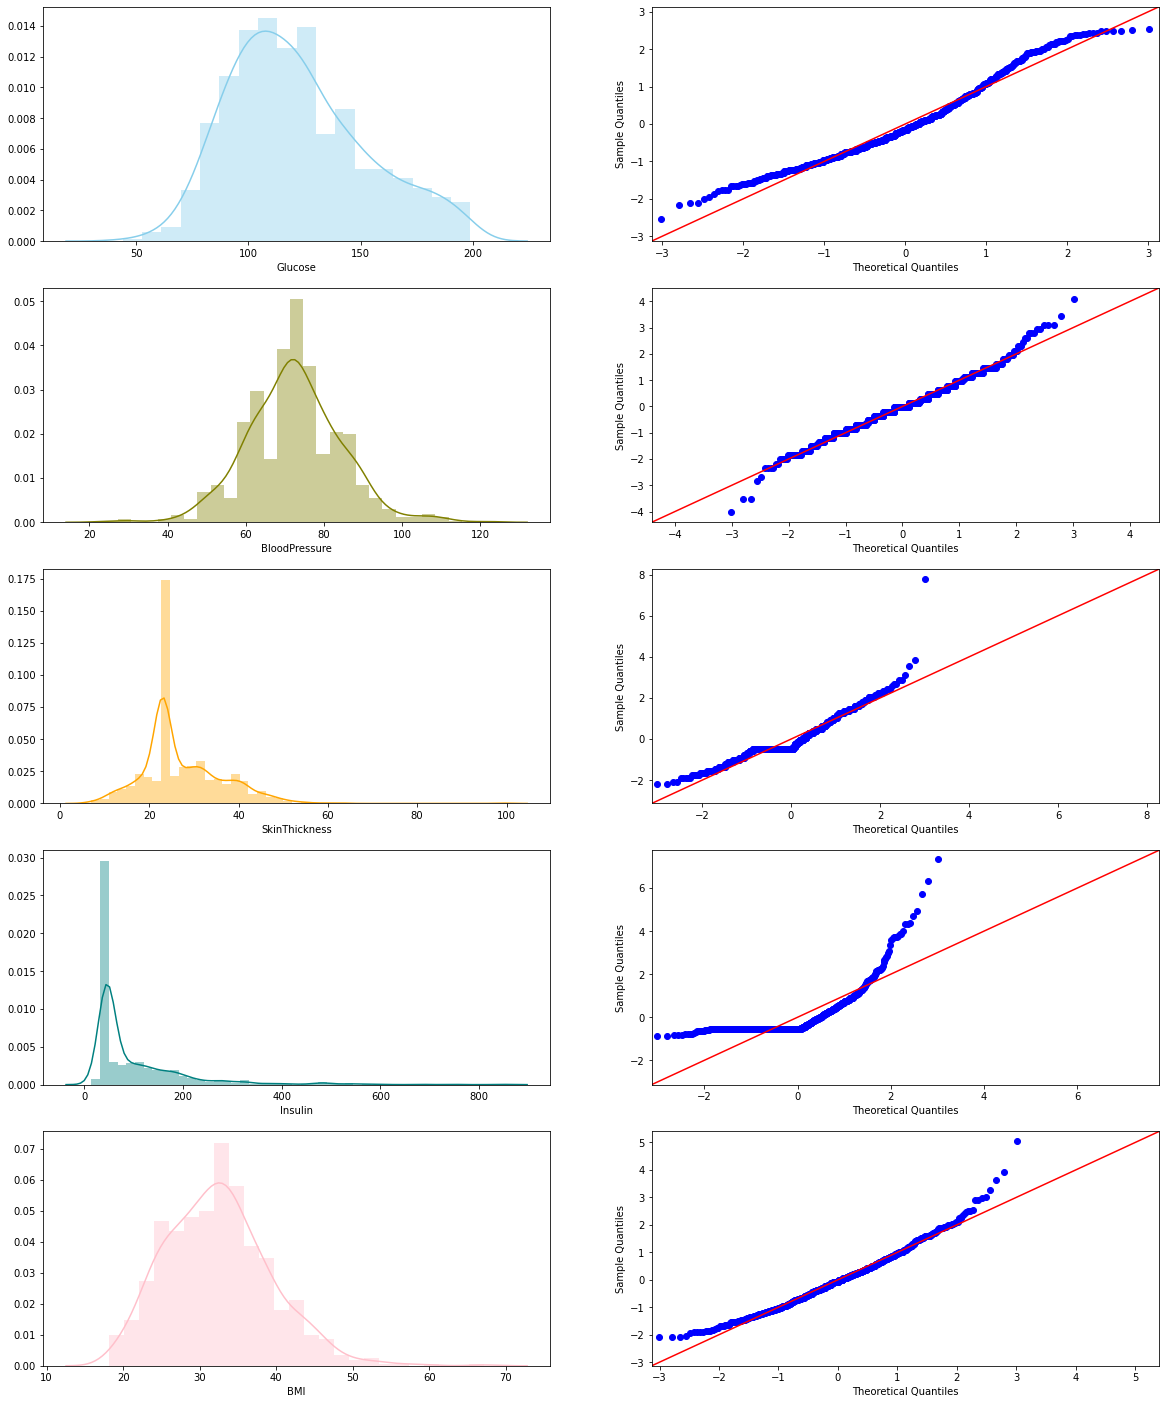

In [31]:
f, axes = plt.subplots(5, 2, figsize=(20, 25))
sns.distplot( Data["Glucose"] , color="skyblue", ax=axes[0,0])
qqplot(Data["Glucose"], line="45", fit=True, ax=axes[0,1])
sns.distplot( Data["BloodPressure"] , color="olive", ax=axes[1, 0])
qqplot(Data["BloodPressure"], line ="45", fit=True, ax=axes[1,1])
sns.distplot( Data["SkinThickness"] , color="Orange", ax=axes[2, 0])
qqplot(Data["SkinThickness"], line ="45", fit=True, ax=axes[2,1])
sns.distplot( Data["Insulin"] , color="teal", ax=axes[3, 0])
qqplot(Data["Insulin"], line ="45", fit=True, ax=axes[3,1])
sns.distplot(Data["BMI"], color="Pink", ax=axes[4, 0])
qqplot(Data["BMI"], line ="45", fit=True, ax=axes[4,1])
plt.show()

###### Bivariate analysis

###### Scatter chart to understand the relation between two variables.

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 0 Text major ticklabel objects>)

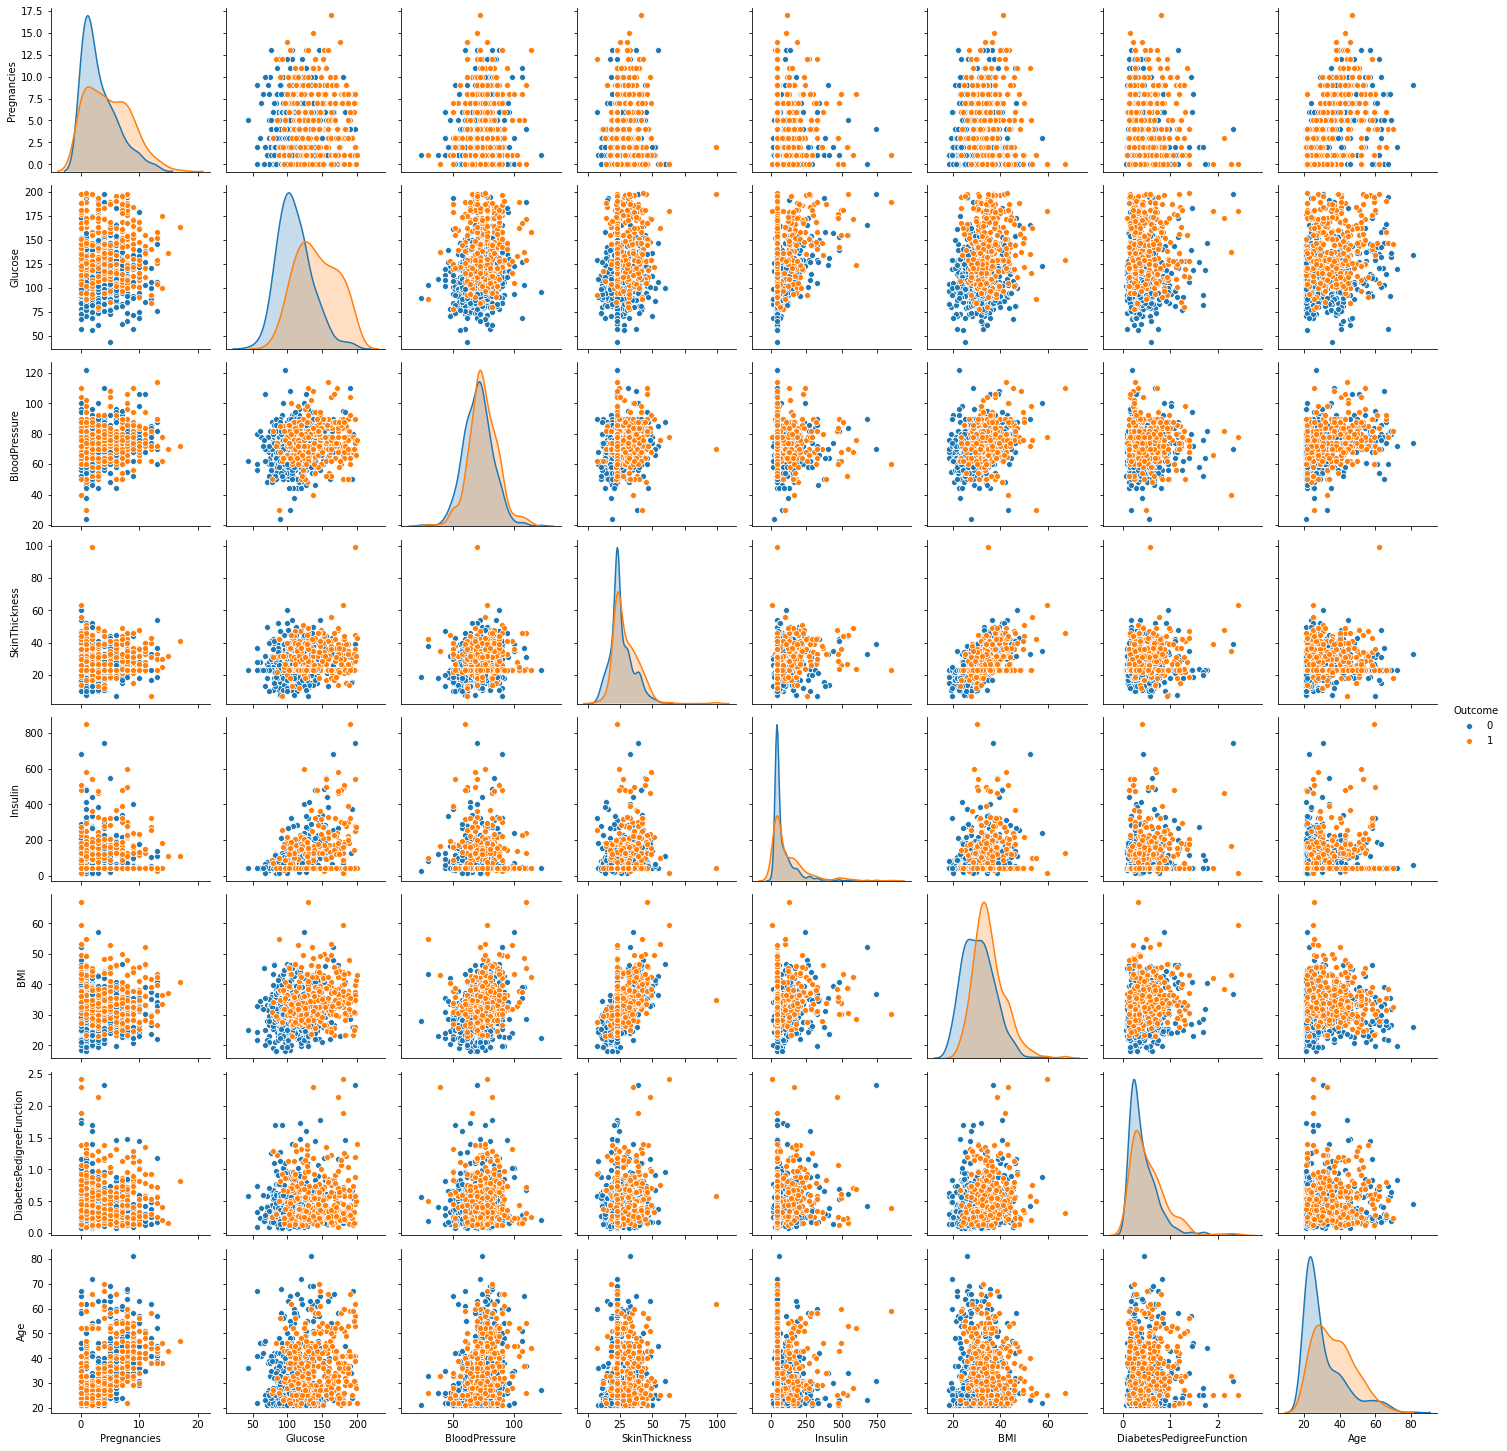

In [32]:
sns.pairplot(data=Data, hue='Outcome')
plt.xticks(fontsize = 50)

###### Analyzing correlation among different variables.

In [33]:
Cor = Data.corr()
print('Correlation Chart for the dataset :')
print('===================================')
Cor

Correlation Chart for the dataset :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.045797,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.369850,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.019376,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.233785,0.546951,0.142977,0.054514,0.189065
Insulin,-0.045797,0.369850,-0.019376,0.233785,1.000000,0.190107,0.173381,-0.000889,0.157428
BMI,0.021546,0.231400,0.281132,0.546951,0.190107,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.173381,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.000889,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.157428,0.312249,0.173844,0.238356,1.000000


###### Visiualizing the correlation using heatmap

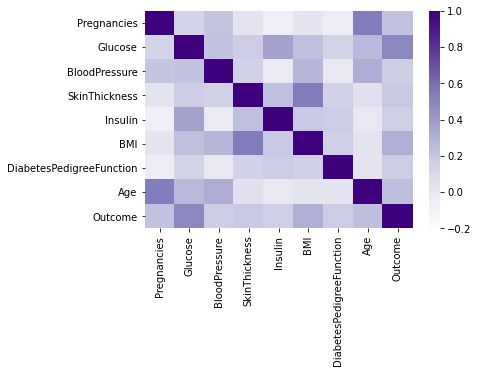

In [34]:
sns.heatmap(data=Cor, vmin=-0.2, vmax=1.0, cmap='Purples')

###### Data Modeling

In [35]:
Model_Data = Data.copy()

In [36]:
Model_Comparision_Report = pd.DataFrame(columns = ['Classifier', 'Accuracy', 'Precision', 'Specificity',
                                                   'Recall/Sensitivity', 'F1', 'ROC-AUC-Score', 'PR-AUC-Score'])

###### Data preprocessing

Selecting independent and target variables

In [37]:
x = pd.DataFrame(Model_Data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]])
y = Data.iloc[:, -1]

Splitting dataset into train and test set in the ratio of 80:20

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state = 60)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((614, 8), (154, 8), (614,), (154,))

Scaling data

In [39]:
scaler = StandardScaler()
scaled_xtrain = scaler.fit_transform(xtrain)
scaled_xtest = scaler.fit_transform(xtest)

Creating ROC curve for tpr=fpr or no-skill classifier

In [40]:
random_probs = [0 for i in range(len(ytest))]
fpr_ns, tpr_ns, thd = roc_curve(ytest, random_probs, pos_label=1)

No skill model, stratified random class predictions for Precision_Recall curve

In [41]:
no_skill = len(y[y==1]) / len(y)
model = DummyClassifier(strategy='stratified', random_state=0)
model.fit(xtrain, ytrain)
yhat = model.predict_proba(xtest)
dummy_probs = yhat[:, 1]
precision, recall, _ = precision_recall_curve(ytest, dummy_probs)
ns_roc_score = metrics.roc_auc_score(ytest, dummy_probs)
ns_pr_score = metrics.auc(recall, precision)
print('ROC-AUC Score for no skill classifier = ', ns_roc_score)
print('Precision_Recal Score for no skill classifier = ', ns_pr_score)

ROC-AUC Score for no skill classifier =  0.5163715971825623
Precision_Recal Score for no skill classifier =  0.46609653962595143


###### KNN Modeling

###### Elbow method to find optimum value of K.

In [42]:
error_rate = []
for i in range(1,30):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(scaled_xtrain, ytrain)
    pred_i = model.predict(scaled_xtest)
    error_rate.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Error Rate')

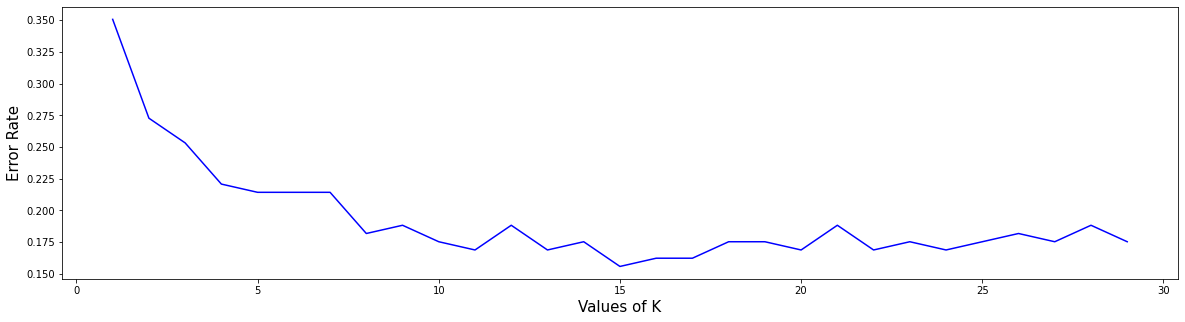

In [43]:
plt.figure(figsize=(20,5))
plt.plot(range(1,30), error_rate,color='blue')
plt.xlabel('Values of K', fontsize=15)
plt.ylabel('Error Rate', fontsize=15)

Elbow method is showing K=15 gives the lowest error rate. 

In [44]:
knn_classifier = KNeighborsClassifier(n_neighbors = 15)
knn_model = knn_classifier.fit(scaled_xtrain, ytrain)
knn_model

KNeighborsClassifier(n_neighbors=15)

In [45]:
ypredict = knn_classifier.predict(scaled_xtest)
prob_predict = knn_classifier.predict_proba(scaled_xtest)

In [46]:
print('Training model score for KNN : ', knn_model.score(scaled_xtrain, ytrain))
print('Test model score for KNN     : ', knn_model.score(scaled_xtest, ytest))

Training model score for KNN :  0.7931596091205212
Test model score for KNN     :  0.8441558441558441


In [47]:
train_matrix = confusion_matrix(ytrain, knn_classifier.predict(scaled_xtrain))
test_matrix = confusion_matrix(ytest, ypredict)
print('Confusion matrix for train data for KNN :')
print('=========================================')
print(train_matrix, '\n')
print('Confusion matrix for test data for KNN :')
print('========================================')
print(test_matrix)

Confusion matrix for train data for KNN :
[[359  38]
 [ 89 128]] 

Confusion matrix for test data for KNN :
[[93 10]
 [14 37]]


In [48]:
print('Classification report for train data for KNN :')
print('==============================================')
print(classification_report(ytrain, knn_classifier.predict(scaled_xtrain)))
print('Classification report for train data for KNN :')
print('==============================================')
print(classification_report(ytest, ypredict))

Classification report for train data for KNN :
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       397
           1       0.77      0.59      0.67       217

    accuracy                           0.79       614
   macro avg       0.79      0.75      0.76       614
weighted avg       0.79      0.79      0.79       614

Classification report for train data for KNN :
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       103
           1       0.79      0.73      0.76        51

    accuracy                           0.84       154
   macro avg       0.83      0.81      0.82       154
weighted avg       0.84      0.84      0.84       154



In [49]:
spec = round((test_matrix[0,0]/(test_matrix[0,0] + test_matrix[0,1]) * 100), 1)
spec

90.3

In [50]:
fpr_knn, tpr_knn, thresh = roc_curve(ytest, prob_predict[:,1], pos_label=1)
precision_knn, recall_knn, _ = precision_recall_curve(ytest, prob_predict[:,1], pos_label=1)
auc_score = roc_auc_score(ytest, prob_predict[:,1])
pr_auc_score = auc(recall_knn, precision_knn)
auc_score =  round((auc_score * 100), 1)
pr_auc_score = round((pr_auc_score * 100), 1)
print('ROC_AUC_Score for KNN : ', auc_score)
print('Precision-Recall Score for KNN : ', pr_auc_score)

ROC_AUC_Score for KNN :  87.2
Precision-Recall Score for KNN :  77.3


In [51]:
ac = round(((metrics.accuracy_score(ytest, ypredict))*100), 1)
f1 = round(((metrics.f1_score(ytest, ypredict))*100), 1)
re = round(((metrics.recall_score(ytest, ypredict))*100), 1)
pr = round(((metrics.precision_score(ytest, ypredict))*100), 1)
Model_Comparision_Report = Model_Comparision_Report.append({'Classifier': 'KNN', 'Accuracy': ac, 'Recall/Sensitivity': re, 
                                                            'Specificity': spec, 'Precision': pr, 'F1': f1, 
                                                            'ROC-AUC-Score': auc_score, 'PR-AUC-Score': pr_auc_score},
                                                             ignore_index=True)

###### SVM Modeling

###### Using Standardized data as it is distance based algorithm.

###### Finding best parameter

In [52]:
param_grid = ({'C': [10, 100, 1000],
              'kernel': ['rbf', 'linear', 'poly'],
              'gamma': ['auto', 'scale']})

In [53]:
cls_svm = svm.SVC()       
grid_search = GridSearchCV(cls_svm, param_grid)
grid_search_model = grid_search.fit(scaled_xtrain, ytrain)

In [54]:
print('Best Parameters : ', grid_search_model.best_params_, '\n')   
print('Best Estimator  : ', grid_search_model.best_estimator_)

Best Parameters :  {'C': 1000, 'gamma': 'auto', 'kernel': 'linear'} 

Best Estimator  :  SVC(C=1000, gamma='auto', kernel='linear')


In [55]:
svm_classifier = svm.SVC(kernel = 'linear', gamma='auto', C=1000)
svm_model = svm_classifier.fit(scaled_xtrain, ytrain)

In [56]:
ypredict = svm_model.predict(scaled_xtest)
prob_predict = svm_classifier.decision_function(scaled_xtest)

In [57]:
print('Training model score for SVM : ', svm_model.score(scaled_xtrain, ytrain))
print('Test model score for SVM     : ', svm_model.score(scaled_xtest, ytest))

Training model score for SVM :  0.7736156351791531
Test model score for SVM     :  0.7727272727272727


In [58]:
train_matrix = confusion_matrix(ytrain, svm_classifier.predict(scaled_xtrain))
test_matrix = confusion_matrix(ytest, ypredict)
print('Confusion matrix for train data for SVM :')
print('=========================================')
print(train_matrix, '\n')
print('Confusion matrix for test data for SVM :')
print('========================================')
print(test_matrix)

Confusion matrix for train data for SVM :
[[352  45]
 [ 94 123]] 

Confusion matrix for test data for SVM :
[[90 13]
 [22 29]]


In [59]:
print('Classification report for train data for SVM :')
print('==============================================')
print(classification_report(ytrain, svm_classifier.predict(scaled_xtrain)))
print('Classification report for test data for SVM :')
print('=============================================')
print(classification_report(ytest, ypredict))

Classification report for train data for SVM :
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       397
           1       0.73      0.57      0.64       217

    accuracy                           0.77       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.77      0.77       614

Classification report for test data for SVM :
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       103
           1       0.69      0.57      0.62        51

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.77      0.77      0.77       154



In [60]:
spec = round((test_matrix[0,0]/(test_matrix[0,0] + test_matrix[0,1]) * 100), 1)
spec

87.4

In [61]:
fpr_svm, tpr_svm, thresh = roc_curve(ytest, prob_predict, pos_label=1)
precision_svm, recall_svm, _ = precision_recall_curve(ytest, prob_predict, pos_label=1)
auc_score = metrics.roc_auc_score(ytest, prob_predict)
pr_auc_score = metrics.auc(recall_svm, precision_svm)
auc_score =  round((auc_score * 100), 1)
pr_auc_score = round((pr_auc_score * 100), 1)
print('ROC_AUC_Score for SVM : ', auc_score)
print('Precision-Recall Score for SVM : ', pr_auc_score)
#prob_predict

ROC_AUC_Score for SVM :  83.7
Precision-Recall Score for SVM :  71.0


In [62]:
ac = round(((metrics.accuracy_score(ytest, ypredict))*100), 1)
f1 = round(((metrics.f1_score(ytest, ypredict))*100), 1)
re = round(((metrics.recall_score(ytest, ypredict))*100), 1)
pr = round(((metrics.precision_score(ytest, ypredict))*100), 1)
Model_Comparision_Report = Model_Comparision_Report.append({'Classifier': 'SVM', 'Accuracy': ac, 'Recall/Sensitivity': re, 
                                                            'Specificity': spec, 'Precision': pr, 'F1': f1, 
                                                            'ROC-AUC-Score': auc_score, 'PR-AUC-Score': pr_auc_score}, 
                                                             ignore_index=True)

###### Naive Bayes Modeling

###### Using original data as the algorithm is not distance based

In [63]:
nb_classifier = GaussianNB()
nb_model = nb_classifier.fit(xtrain, ytrain)

In [64]:
ypredict = nb_classifier.predict(xtest)
prob_predict = nb_classifier.predict_proba(scaled_xtest)

In [65]:
print('Training model score for Naive_Bayes : ', nb_model.score(xtrain, ytrain))
print('Test model score for Naive_Bayes     : ', nb_model.score(xtest, ytest))

Training model score for Naive_Bayes :  0.745928338762215
Test model score for Naive_Bayes     :  0.7662337662337663


In [66]:
train_matrix = confusion_matrix(ytrain, nb_classifier.predict(xtrain))
test_matrix = confusion_matrix(ytest, ypredict)
print('Confusion matrix for train data for naive bayes :')
print('=================================================')
print(train_matrix, '\n')
print('Confusion matrix for test data for naive bayes :')
print('================================================')
print(test_matrix)

Confusion matrix for train data for naive bayes :
[[332  65]
 [ 91 126]] 

Confusion matrix for test data for naive bayes :
[[83 20]
 [16 35]]


In [67]:
print('Classification report for train data for naive bayes :')
print('======================================================')
print(classification_report(ytrain, nb_classifier.predict(xtrain)))
print('Classification report for test data for naive bayes :')
print('=====================================================')
print(classification_report(ytest, ypredict))

Classification report for train data for naive bayes :
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       397
           1       0.66      0.58      0.62       217

    accuracy                           0.75       614
   macro avg       0.72      0.71      0.71       614
weighted avg       0.74      0.75      0.74       614

Classification report for test data for naive bayes :
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       103
           1       0.64      0.69      0.66        51

    accuracy                           0.77       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.77      0.77       154



In [68]:
spec = round((test_matrix[0,0]/(test_matrix[0,0] + test_matrix[0,1]) * 100), 1)
spec

80.6

In [69]:
fpr_nb, tpr_nb, thresh = roc_curve(ytest, prob_predict[:,1], pos_label=1)
precision_nb, recall_nb, _ = precision_recall_curve(ytest, prob_predict[:,1], pos_label=1)
auc_score = metrics.roc_auc_score(ytest, prob_predict[:,1])
pr_auc_score = metrics.auc(recall_nb, precision_nb)
auc_score =  round((auc_score * 100), 1)
pr_auc_score = round((pr_auc_score * 100), 1)
print('ROC_AUC_Score for Naive Bayes : ', auc_score)
print('Precision-Recall Score for Naive Bayes : ', pr_auc_score)

ROC_AUC_Score for Naive Bayes :  52.6
Precision-Recall Score for Naive Bayes :  40.8


In [70]:
ac = round(((metrics.accuracy_score(ytest, ypredict))*100), 1)
f1 = round(((metrics.f1_score(ytest, ypredict))*100), 1)
re = round(((metrics.recall_score(ytest, ypredict))*100), 1)
pr = round(((metrics.precision_score(ytest, ypredict))*100), 1)
Model_Comparision_Report = Model_Comparision_Report.append({'Classifier': 'Naive Bayes', 'Accuracy': ac, 
                                                            'Recall/Sensitivity': re, 'Specificity': spec, 
                                                            'Precision': pr, 'F1': f1, 'ROC-AUC-Score': auc_score, 
                                                            'PR-AUC-Score': pr_auc_score}, ignore_index=True)

###### Random Forest Modeling

In [71]:
rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=15, max_features='log2', random_state=95)
rf_model = rf_classifier.fit(scaled_xtrain, ytrain)

In [72]:
ypredict = rf_classifier.predict(scaled_xtest)
prob_predict = rf_classifier.predict_proba(scaled_xtest)

In [73]:
print('Training model score for Random_Forest : ', rf_model.score(scaled_xtrain, ytrain))
print('Test model score for Random_Forest     : ', rf_model.score(scaled_xtest, ytest))

Training model score for Random_Forest :  1.0
Test model score for Random_Forest     :  0.7987012987012987


In [74]:
train_matrix = confusion_matrix(ytrain, rf_classifier.predict(scaled_xtrain))
test_matrix = confusion_matrix(ytest, ypredict)
print('Confusion matrix for train data for random forest :')
print('===================================================')
print(train_matrix, '\n')
print('Confusion matrix for test data for random forest :')
print('==================================================')
print(test_matrix)

Confusion matrix for train data for random forest :
[[397   0]
 [  0 217]] 

Confusion matrix for test data for random forest :
[[86 17]
 [14 37]]


In [75]:
print('Classification report for train data for random forest :')
print('========================================================')
print(classification_report(ytrain, rf_classifier.predict(scaled_xtrain)))
print('Classification report for test data for random forest :')
print('=======================================================')
print(classification_report(ytest, ypredict))

Classification report for train data for random forest :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       217

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

Classification report for test data for random forest :
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       103
           1       0.69      0.73      0.70        51

    accuracy                           0.80       154
   macro avg       0.77      0.78      0.78       154
weighted avg       0.80      0.80      0.80       154



In [76]:
spec = round((test_matrix[0,0]/(test_matrix[0,0] + test_matrix[0,1]) * 100), 1)
spec

83.5

In [77]:
fpr_rf, tpr_rf, thresh = roc_curve(ytest, prob_predict[:,1], pos_label=1)
precision_rf, recall_rf, _ = precision_recall_curve(ytest, prob_predict[:,1], pos_label=1)
auc_score = metrics.roc_auc_score(ytest, prob_predict[:,1])
pr_auc_score = metrics.auc(recall_rf, precision_rf)
auc_score =  round((auc_score * 100), 1)
pr_auc_score = round((pr_auc_score * 100), 1)
print('ROC_AUC_Score for Random Forest : ', auc_score)
print('Precision-Recall Score for Random Forest : ', pr_auc_score)

ROC_AUC_Score for Random Forest :  83.9
Precision-Recall Score for Random Forest :  70.1


In [78]:
ac = round(((metrics.accuracy_score(ytest, ypredict))*100), 1)
f1 = round(((metrics.f1_score(ytest, ypredict))*100), 1)
re = round(((metrics.recall_score(ytest, ypredict))*100), 1)
pr = round(((metrics.precision_score(ytest, ypredict))*100), 1)
Model_Comparision_Report = Model_Comparision_Report.append({'Classifier': 'Random Forest', 'Accuracy': ac, 
                                                            'Recall/Sensitivity': re, 'Specificity': spec, 
                                                            'Precision': pr, 'F1': f1, 'ROC-AUC-Score': auc_score, 
                                                            'PR-AUC-Score': pr_auc_score}, ignore_index=True)

###### Logistic Regression

In [79]:
lr_classifier = LogisticRegression()
lr_model = lr_classifier.fit(scaled_xtrain, ytrain)

In [80]:
ypredict = lr_classifier.predict(scaled_xtest)
prob_predict = lr_classifier.predict_proba(scaled_xtest)

In [81]:
print('Training model score for Logistic_Regression : ', lr_model.score(scaled_xtrain, ytrain))
print('Test model score for Logistic_Regression     : ', lr_model.score(scaled_xtest, ytest))

Training model score for Logistic_Regression :  0.7736156351791531
Test model score for Logistic_Regression     :  0.7727272727272727


In [82]:
train_matrix = confusion_matrix(ytrain, lr_classifier.predict(scaled_xtrain))
test_matrix = confusion_matrix(ytest, ypredict)
print('Confusion matrix for train data for logistic regression :')
print('=========================================================')
print(train_matrix, '\n')
print('Confusion matrix for test data for logistic regression :')
print('========================================================')
print(test_matrix)

Confusion matrix for train data for logistic regression :
[[348  49]
 [ 90 127]] 

Confusion matrix for test data for logistic regression :
[[90 13]
 [22 29]]


In [83]:
print('Classification report for train data for logistic regression :')
print('==============================================================')
print(classification_report(ytrain, lr_classifier.predict(scaled_xtrain)))
print('Classification report for test data for logistic regression :')
print('=============================================================')
print(classification_report(ytest, ypredict))

Classification report for train data for logistic regression :
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       397
           1       0.72      0.59      0.65       217

    accuracy                           0.77       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.77      0.77       614

Classification report for test data for logistic regression :
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       103
           1       0.69      0.57      0.62        51

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.77      0.77      0.77       154



In [84]:
spec = round((test_matrix[0,0]/(test_matrix[0,0] + test_matrix[0,1]) * 100), 1)
spec

87.4

In [85]:
fpr_lr, tpr_lr, thresh = roc_curve(ytest, prob_predict[:,1], pos_label=1)
precision_lr, recall_lr, _ = precision_recall_curve(ytest, prob_predict[:,1], pos_label=1)
auc_score = metrics.roc_auc_score(ytest, prob_predict[:,1])
pr_auc_score = metrics.auc(recall_lr, precision_lr)
auc_score =  round((auc_score * 100), 1)
pr_auc_score = round((pr_auc_score * 100), 1)
print('ROC_AUC_Score for Logistic Regression : ', auc_score)
print('Precision-Recall Score for Logistic Regression : ', pr_auc_score)

ROC_AUC_Score for Logistic Regression :  83.3
Precision-Recall Score for Logistic Regression :  70.8


In [86]:
ac = round(((metrics.accuracy_score(ytest, ypredict))*100), 1)
f1 = round(((metrics.f1_score(ytest, ypredict))*100), 1)
re = round(((metrics.recall_score(ytest, ypredict))*100), 1)
pr = round(((metrics.precision_score(ytest, ypredict))*100), 1)
Model_Comparision_Report = Model_Comparision_Report.append({'Classifier': 'Logistic Regression', 'Accuracy': ac, 
                                                            'Recall/Sensitivity': re, 'Specificity': spec, 
                                                            'Precision': pr, 'F1': f1, 'ROC-AUC-Score': auc_score, 
                                                             'PR-AUC-Score': pr_auc_score}, ignore_index=True)

###### ROC - AUC Plot

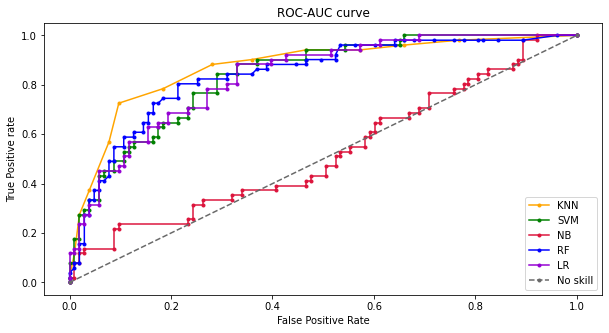

In [87]:
plt.figure(figsize=(10, 5))
plt.plot(fpr_knn, tpr_knn, color='orange', label='KNN', marker='.')
plt.plot(fpr_svm, tpr_svm, color='green', label='SVM', marker='.')
plt.plot(fpr_nb, tpr_nb, color='crimson', label='NB', marker='.')
plt.plot(fpr_rf, tpr_rf, color='blue', label='RF', marker='.')
plt.plot(fpr_lr, tpr_lr, color='darkviolet', label='LR', marker='.')
plt.plot(fpr_ns, tpr_ns, linestyle='--', color='dimgrey', label='No skill', marker='.')

plt.title('ROC-AUC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.show()

###### Precesion - Recall Curve

For imbalance data set Precesion-Recall Curve is also used for checking the tradeoff between Recall and Recall

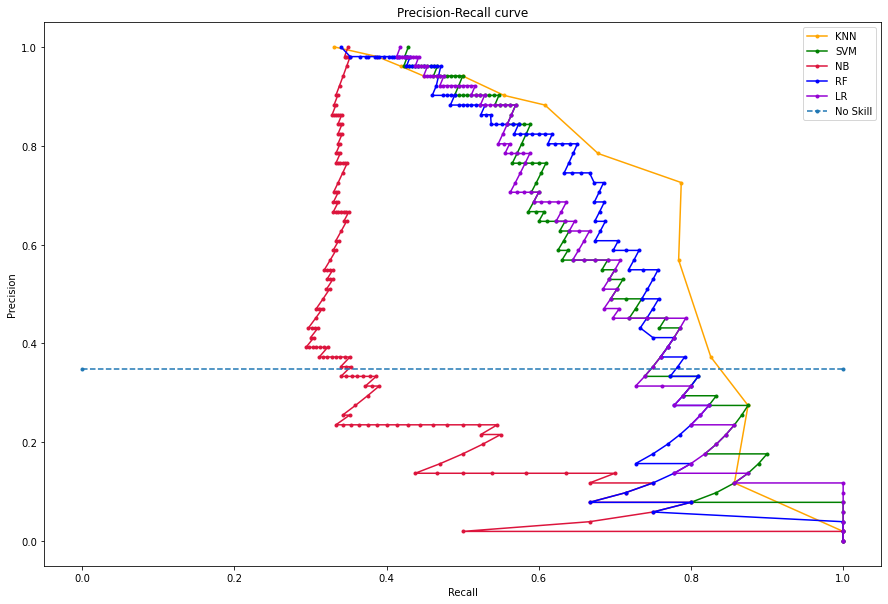

In [88]:
plt.figure(figsize=(15, 10))
plt.plot(precision_knn, recall_knn, color='orange', label='KNN', marker='.')
plt.plot(precision_svm, recall_svm, color='green', label='SVM', marker='.')
plt.plot(precision_nb, recall_nb, color='crimson', label='NB', marker='.')
plt.plot(precision_rf, recall_rf, color='blue', label='RF', marker='.')
plt.plot(precision_lr, recall_lr, color='darkviolet', label='LR', marker='.')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', marker='.')

plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')

plt.show()

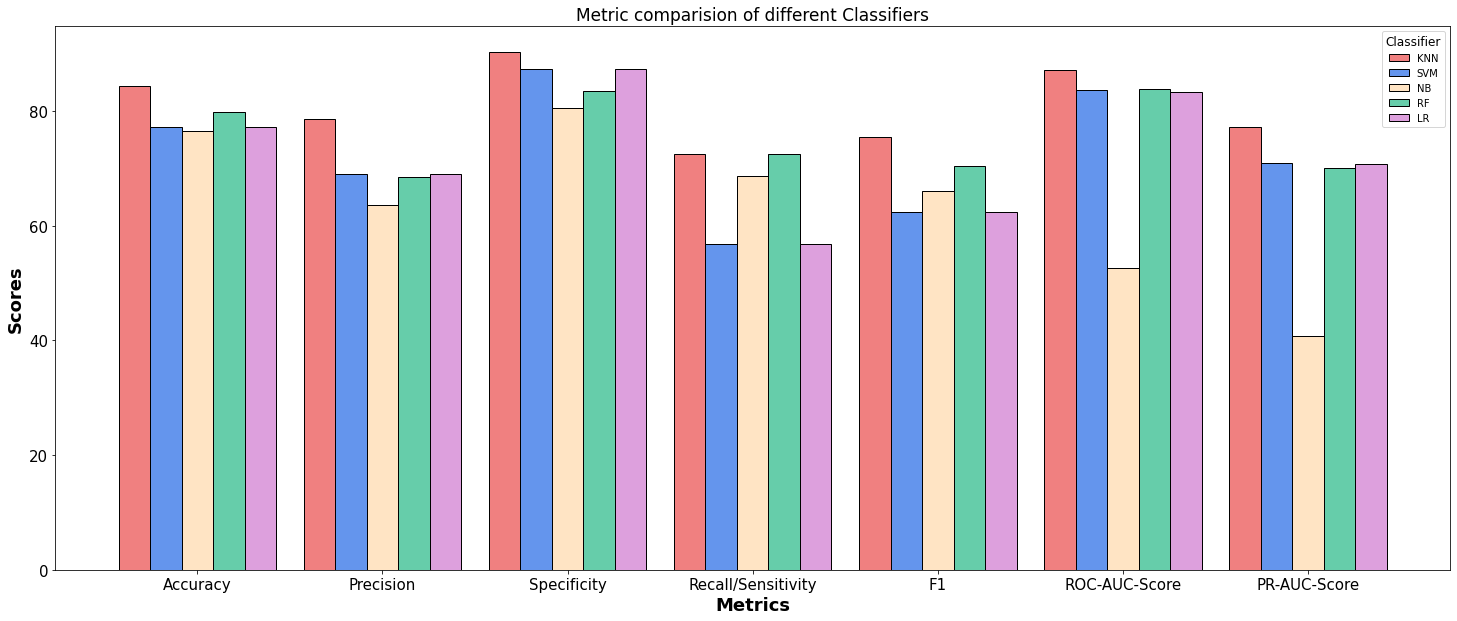

In [89]:
plt.figure(figsize=(25, 10))
barWidth = 0.17
 
bars1 = Model_Comparision_Report.iloc[0, 1:8]
bars2 = Model_Comparision_Report.iloc[1, 1:8]
bars3 = Model_Comparision_Report.iloc[2, 1:8]
bars4 = Model_Comparision_Report.iloc[3, 1:8]
bars5 = Model_Comparision_Report.iloc[4, 1:8]
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
plt.bar(r1, bars1, color='lightcoral', width=barWidth, edgecolor='black', label='KNN')
plt.bar(r2, bars2, color='cornflowerblue', width=barWidth, edgecolor='black', label='SVM')
plt.bar(r3, bars3, color='bisque', width=barWidth, edgecolor='black', label='NB')
plt.bar(r4, bars4, color='mediumaquamarine', width=barWidth, edgecolor='black', label='RF')
plt.bar(r5, bars5, color='plum', width=barWidth, edgecolor='black', label='LR')
 
plt.title('Metric comparision of different Classifiers', fontsize=17)
plt.xlabel('Metrics', fontsize=18, fontweight='bold')
plt.ylabel('Scores', fontsize=18, fontweight='bold')
plt.xticks([r + 2*barWidth for r in range(len(bars1))], ['Accuracy', 'Precision', 'Specificity', 
                                                         'Recall/Sensitivity', 'F1', 'ROC-AUC-Score', 'PR-AUC-Score'], 
            fontsize=15)
 
plt.yticks(fontsize = 15)
plt.legend(title='Classifier', fontsize=10, title_fontsize=12, loc='best')
plt.show()


###### Classification report

In [90]:
Model_Comparision_Report

,Classifier,Accuracy,Precision,Specificity,Recall/Sensitivity,F1,ROC-AUC-Score,PR-AUC-Score
0,KNN,84.4,78.7,90.3,72.5,75.5,87.2,77.3
1,SVM,77.3,69.0,87.4,56.9,62.4,83.7,71.0
2,Naive Bayes,76.6,63.6,80.6,68.6,66.0,52.6,40.8
3,Random Forest,79.9,68.5,83.5,72.5,70.5,83.9,70.1
4,Logistic Regression,77.3,69.0,87.4,56.9,62.4,83.3,70.8


From the above table it is clear that KNN is the best clustering algorithm for the given dataset. 
It performs best in all the parameters. Its accuracy is the highest.

###### END